# Import Packages

### We will be using numerous techniques to evaluate the data. Let's import several packages now so they are available for use.

In [1]:
#standard package loadout
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

#import image
from IPython.display import Image

#import stats
import scipy.stats as stats
from statsmodels.stats.multicomp import pairwise_tukeyhsd

#regression package loadout
import sklearn.linear_model as lm
from sklearn.metrics import mean_squared_error
from sklearn.metrics import explained_variance_score
import statsmodels.formula.api as sm

#import logisticregression classifier
from sklearn.linear_model import LogisticRegression
#import statsmodels.api as sm

#for validating classification model
from sklearn.cross_validation import train_test_split
from sklearn.cross_validation import cross_val_score
from sklearn import metrics
from sklearn.metrics import roc_curve, auc

#import decisiontreeclassifier
from sklearn import tree
from sklearn.tree import DecisionTreeClassifier

# visualize data tree
from sklearn.externals.six import StringIO
import pydotplus

#import knn classifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.grid_search import GridSearchCV

#import randomforestclassifer
from sklearn.ensemble import RandomForestClassifier

c:\users\sneak\anaconda2\lib\site-packages\sklearn\cross_validation.py:41: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)
c:\users\sneak\anaconda2\lib\site-packages\sklearn\grid_search.py:42: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. This module will be removed in 0.20.
  DeprecationWarning)


# Context

### Since the great recession began in 2008 state budgets for higher education have been reduced to levels that make it difficult for families to afford the cost of higher tuition and harder for universities to provide the level of services that they were able to prior to the recession. Universities have increasingly turned to philanthropic donors to offset the reduction in budget cuts.

### You have recently been hired by Northeast Southwest State Technological University, NESW State Tech for short, to assist them in the identification of potential donors to the university. Budgets are tight so assisting the development officers in identifying the best potential donors will increase their efficiency and provide for a better return on investment of the fundraising efforts. You have been informed that there are already some donor prospects coded as major giving prospects based on thier past giving in the database. Your task will be to explore the database and determine the best way to identify new major giving donor prospects for the future.

### For additional information on state education budgeting please reference: https://www.cbpp.org/research/state-budget-and-tax/a-lost-decade-in-higher-education-funding

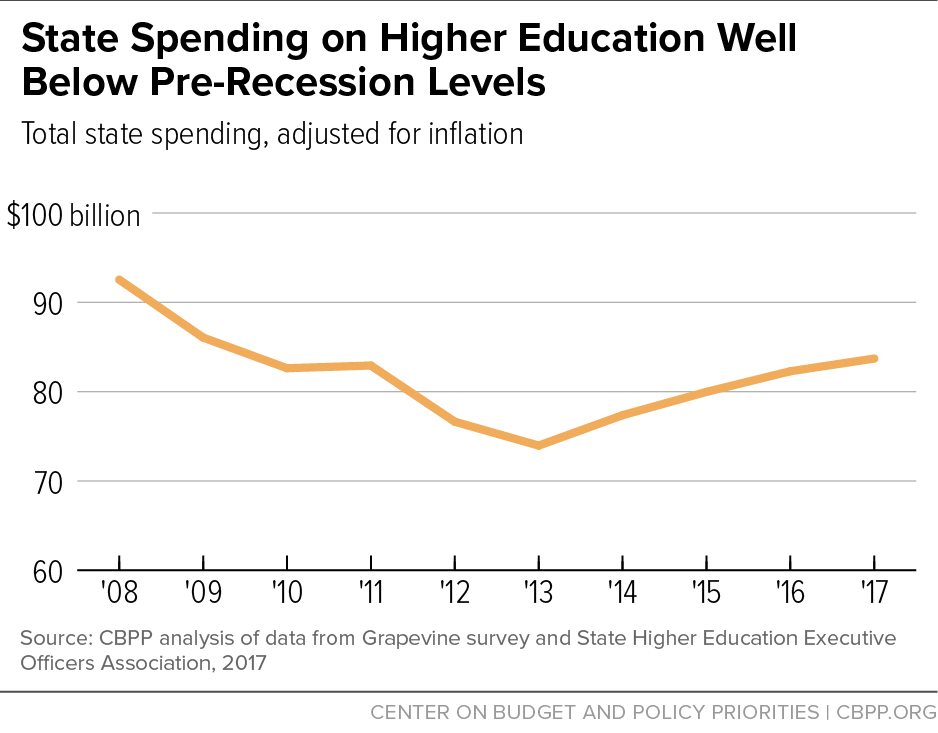

In [2]:
# load Region Map
Image("images/StateSpendingHigherEd.png")

# Dataset Documentation

### IMPORTANT NOTE: The dataset for this project was synthetically created to mimic realistic data but not contain any real data, i.e. all information was artificially created. This includes the names in the dataset. No identification with actual persons (living or deceased) is intended or should be inferred.

## Dataset Variables
### ID: This is the unique ID for each prospect.
### FirstName: First name of the prospect.
### LastName: Last name of the prospect.
### Age: Age of the prospect.
### Alumni: Indicates if the prospect is an alumnus of NESW State Tech.
### MarriedToAlum: Indicates if the prospect is married to an alumnus of NESW State Tech.
### StudentOrg: Numeric value of the how many organizations prospect was involved with while a student.
### Volunteer: Numeric value of how many times prospect has volunteered to assist with university functions.
### Affiliations: Numeric value of how many affiliations the prospect currently has to the university. (Example: Alumni Association member.)
### EventCount: Numeric value of how many university events the prospect has attended.
### AvgGivingLast5Yrs: The average amount of donations the prospect has given in the last five years. 
### MajorGiftProspect: Indicates if the prospect is already regarded as a major giving prospect.
### GiftCount: The number of gifts the prospect has given to the university.
### CapacityValue: Estimated maximum the prospect can donate in a five-year period to all philanthropic interests.


# Develop Hypothesis

### Developing hypothesizes after reviewing the contex of the problem you are trying to solve and the description of the data available allows you to set a priority of what things to look for and test.

## Hypothesis 1: 

### H0: The number of university events a prospect attends does not affect the likehood a prospect should be considered a major giving donor prospect.
### H1: The number of university events a prospect attends does affect the likehood a prospect should be considered a major giving donor prospect.

## Hypothesis 2: 

### H0: The capacity value of a prospect does not affect the likehood a prospect should be considered a major giving donor prospect.
### H1: The capacity value of a prospect does affect the likehood a prospect should be considered a major giving donor prospect.

## Load & Prepare Dataset

In [3]:
# load dataset
prospect = pd.read_csv("data/prospect.csv")
prospect.head()

ID FirstName   LastName  Age  Alumni  MarriedToAlum  StudentOrg  Volunteer  \
0   4       Ari      Stark   34       1              1           0          0   
1   5   Addison    Parrish   56       1              1           0          0   
2   7     Milan  Hendricks   34       1              0           0          0   
3   8     Ayaan    Parsons   34       1              0           0          0   
4  13    Skylar  Blanchard   34       1              0           1          0   

   Affiliations  EventCount  AvgGivingLast5Yrs  MajorGiftProspect  GiftCount  \
0             1           1               1417                  0          6   
1             0           1                179                  0         11   
2             0           0                417                  0          1   
3             0           0                417                  0          1   
4             0           0               1333                  0          8   

   CapacityValue  
0          21129  
1          22679  
2          22678  
3          17547  
4          15581

In [4]:
# remove 'ID' "First Name' and 'Last Name' columns as they are not needed for analysis
prospect = prospect.drop(['ID', 'FirstName', 'LastName'], axis=1)
prospect.head()

Age  Alumni  MarriedToAlum  StudentOrg  Volunteer  Affiliations  \
0   34       1              1           0          0             1   
1   56       1              1           0          0             0   
2   34       1              0           0          0             0   
3   34       1              0           0          0             0   
4   34       1              0           1          0             0   

   EventCount  AvgGivingLast5Yrs  MajorGiftProspect  GiftCount  CapacityValue  
0           1               1417                  0          6          21129  
1           1                179                  0         11          22679  
2           0                417                  0          1          22678  
3           0                417                  0          1          17547  
4           0               1333                  0          8          15581

In [5]:
# verifiy the data types & check for missing missing data
prospect.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 35135 entries, 0 to 35134
Data columns (total 11 columns):
Age                  35135 non-null int64
Alumni               35135 non-null int64
MarriedToAlum        35135 non-null int64
StudentOrg           35135 non-null int64
Volunteer            35135 non-null int64
Affiliations         35135 non-null int64
EventCount           35135 non-null int64
AvgGivingLast5Yrs    35135 non-null int64
MajorGiftProspect    35135 non-null int64
GiftCount            35135 non-null int64
CapacityValue        35135 non-null int64
dtypes: int64(11)
memory usage: 2.9 MB


### All unnecessary data variables have been removed, all variables are the correct data type, and there is no missing data. We are ready to proceed.

# Descriptive Analytics, Data Visualization, and Hypothesis Testing

In [6]:
# run describe to gain basic insight into data
prospect.describe()

Age        Alumni  MarriedToAlum    StudentOrg     Volunteer  \
count  35135.000000  35135.000000   35135.000000  35135.000000  35135.000000   
mean      60.047702      0.870528       0.220834      0.532944      0.038395   
std       14.389805      0.335726       0.414815      0.970499      0.214810   
min       30.000000      0.000000       0.000000      0.000000      0.000000   
25%       50.000000      1.000000       0.000000      0.000000      0.000000   
50%       60.000000      1.000000       0.000000      0.000000      0.000000   
75%       70.000000      1.000000       0.000000      1.000000      0.000000   
max       99.000000      1.000000       1.000000      8.000000      4.000000   

       Affiliations    EventCount  AvgGivingLast5Yrs  MajorGiftProspect  \
count  35135.000000  35135.000000       35135.000000       35135.000000   
mean       0.871012      0.978312        1836.609193           0.091220   
std        1.091314      3.190020        5343.452898           0.287925   
min        0.000000      0.000000          37.000000           0.000000   
25%        0.000000      0.000000         158.000000           0.000000   
50%        1.000000      0.000000         358.000000           0.000000   
75%        1.000000      1.000000        1159.000000           0.000000   
max       12.000000     98.000000       99342.000000           1.000000   

          GiftCount  CapacityValue  
count  35135.000000   3.513500e+04  
mean      32.865462   3.833032e+04  
std       32.879637   1.450547e+05  
min        1.000000   1.010000e+02  
25%       13.000000   1.179000e+04  
50%       24.000000   2.329900e+04  
75%       42.000000   3.777700e+04  
max      482.000000   4.986899e+06

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x000000000E8AEEF0>,
        <matplotlib.axes._subplots.AxesSubplot object at 0x000000000FC8B5C0>]], dtype=object)

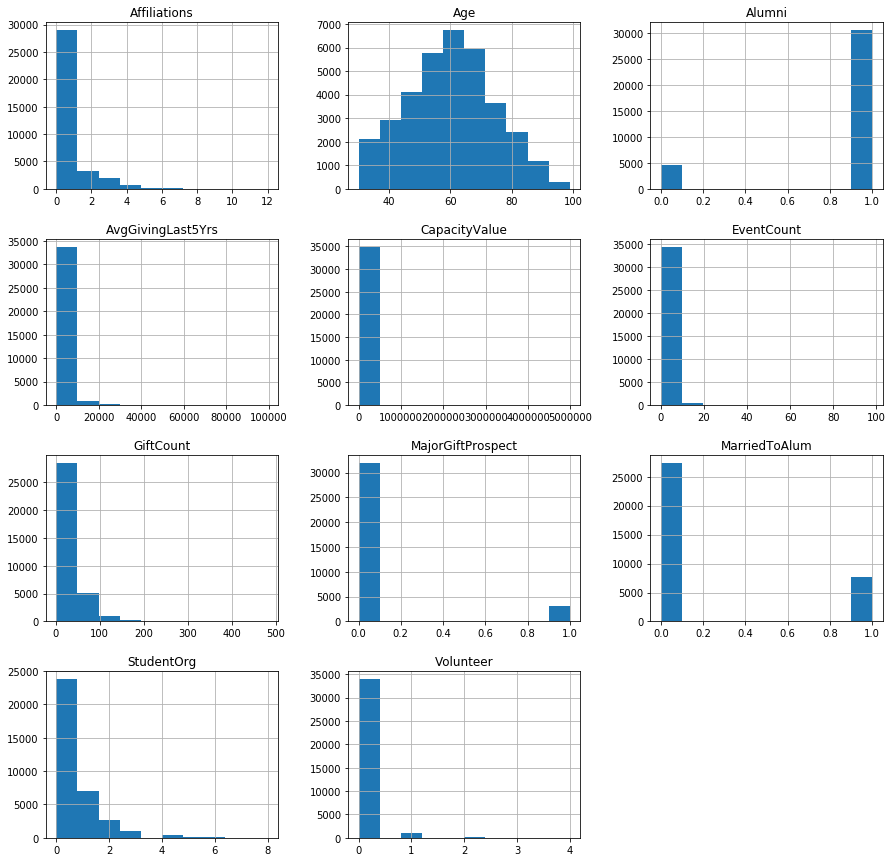

In [7]:
# create a histogram for each variable to get first peak into data visually
prospect.hist(figsize=(15,15))

### We know that the database already has certain prospects coded as Major Gift based on prior giving. Let's examine the differences between those that are already coded and those that are not.

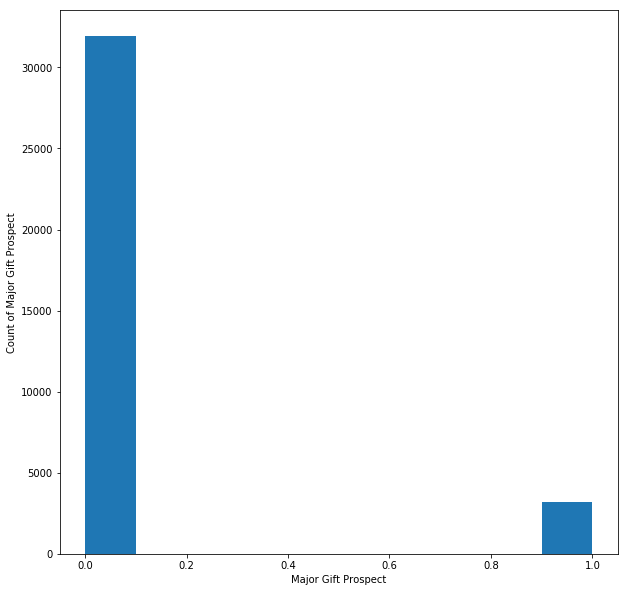

In [8]:
# more granual histogram for MajorGiftProspect

plt.figure(figsize=(10,10))
bins = 25
plt.hist(prospect['MajorGiftProspect'], label='Major Gift Prospect')
plt.xlabel('Major Gift Prospect')
plt.ylabel('Count of Major Gift Prospect')

In [9]:
# group dataset by all prospects not considered MajorGiftProspect and use describe to get descriptive statistics about them
majorGift0 = prospect[prospect['MajorGiftProspect'] == 0]
majorGift0.describe()

Age        Alumni  MarriedToAlum    StudentOrg     Volunteer  \
count  31930.000000  31930.000000   31930.000000  31930.000000  31930.000000   
mean      59.496586      0.878202       0.217664      0.521735      0.029721   
std       14.425510      0.327057       0.412664      0.950848      0.185002   
min       30.000000      0.000000       0.000000      0.000000      0.000000   
25%       49.000000      1.000000       0.000000      0.000000      0.000000   
50%       60.000000      1.000000       0.000000      0.000000      0.000000   
75%       69.000000      1.000000       0.000000      1.000000      0.000000   
max       99.000000      1.000000       1.000000      8.000000      3.000000   

       Affiliations    EventCount  AvgGivingLast5Yrs  MajorGiftProspect  \
count  31930.000000  31930.000000       31930.000000            31930.0   
mean       0.648700      0.611964         742.067022                0.0   
std        0.752968      1.663455        1342.629855                0.0   
min        0.000000      0.000000          37.000000                0.0   
25%        0.000000      0.000000         147.000000                0.0   
50%        1.000000      0.000000         304.000000                0.0   
75%        1.000000      1.000000         775.000000                0.0   
max        7.000000     32.000000       50543.000000                0.0   

          GiftCount  CapacityValue  
count  31930.000000   3.193000e+04  
mean      29.843940   2.682548e+04  
std       28.535931   7.850477e+04  
min        1.000000   1.010000e+02  
25%       12.000000   1.092450e+04  
50%       22.000000   2.180650e+04  
75%       38.000000   3.559700e+04  
max      455.000000   4.521368e+06

In [10]:
# group dataset by all prospects considered MajorGiftProspect and use describe to get descriptive statistics about them
majorGift1 = prospect[prospect['MajorGiftProspect'] == 1]
majorGift1.describe()

Age       Alumni  MarriedToAlum   StudentOrg    Volunteer  \
count  3205.000000  3205.000000    3205.000000  3205.000000  3205.000000   
mean     65.538222     0.794072       0.252418     0.644618     0.124805   
std      12.794381     0.404441       0.434468     1.142229     0.395858   
min      31.000000     0.000000       0.000000     0.000000     0.000000   
25%      57.000000     1.000000       0.000000     0.000000     0.000000   
50%      66.000000     1.000000       0.000000     0.000000     0.000000   
75%      74.000000     1.000000       1.000000     1.000000     0.000000   
max      99.000000     1.000000       1.000000     8.000000     4.000000   

       Affiliations   EventCount  AvgGivingLast5Yrs  MajorGiftProspect  \
count   3205.000000  3205.000000        3205.000000             3205.0   
mean       3.085803     4.628081       12741.049610                1.0   
std        1.417895     8.327764       12816.005053                0.0   
min        0.000000     0.000000        1867.000000                1.0   
25%        2.000000     0.000000        4960.000000                1.0   
50%        3.000000     2.000000        8096.000000                1.0   
75%        4.000000     5.000000       14867.000000                1.0   
max       12.000000    98.000000       99342.000000                1.0   

         GiftCount  CapacityValue  
count  3205.000000   3.205000e+03  
mean     62.967551   1.529480e+05  
std      52.368665   3.935102e+05  
min       1.000000   1.059000e+03  
25%      27.000000   3.003300e+04  
50%      50.000000   4.261300e+04  
75%      83.000000   1.275620e+05  
max     482.000000   4.986899e+06

### From reviewing the descriptive analytics between those already considered major gift prospects and those not considered major gift prospects we can identify some differences. Some key findings are that major gift prospects tend to be older, more involved with university affiliations and events, give more and more often, and have a higher capacity to give than those that are not already considered major gift prospects. Interestingly, major gift donors are less likely to be an alumnus to NESW State Tech.

### Lets visually examine the data to get a better feeling for what we are dealing with and to have visualizations available for any reporting purposes.

## Visually explore nominal data differences

### Age

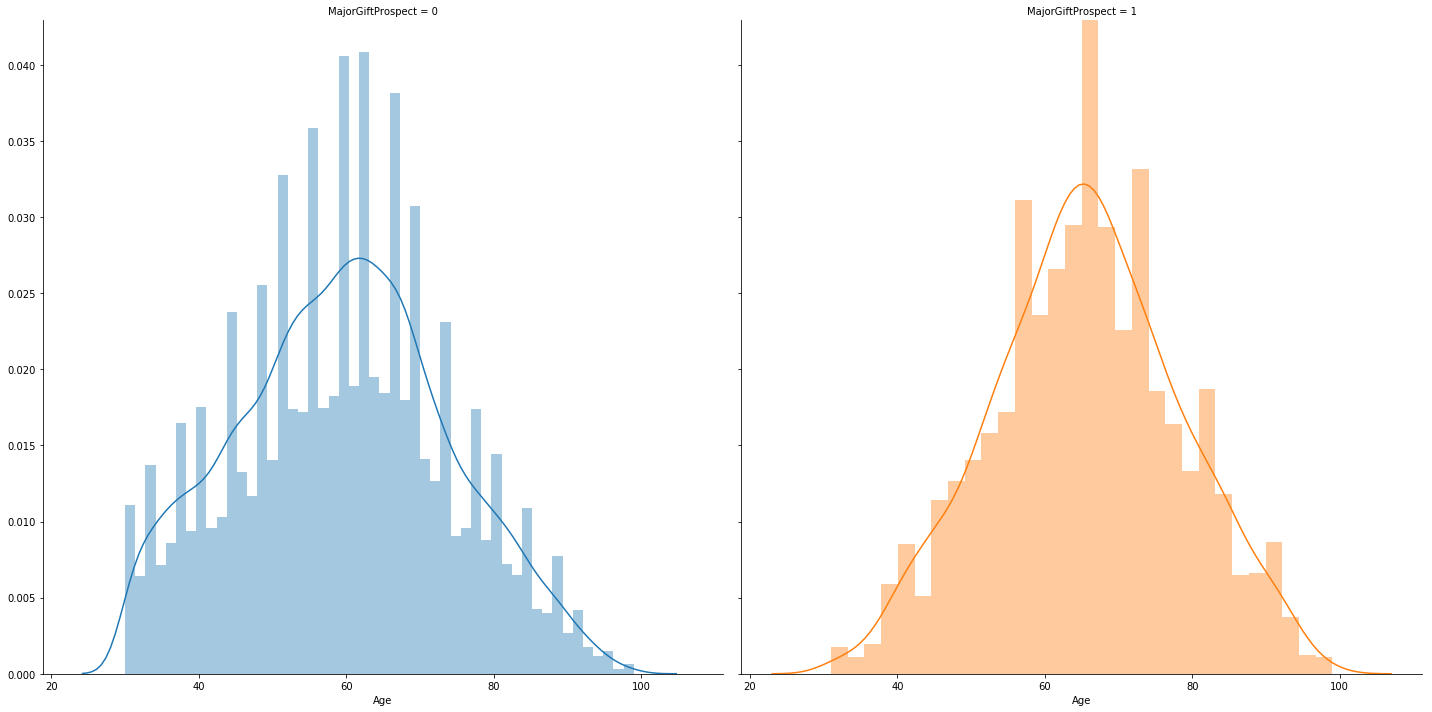

In [11]:
# explore relationship between Age and MajorGiftProspect

g = sns.FacetGrid(prospect, col='MajorGiftProspect', hue='MajorGiftProspect', size=10, aspect=1) 
g.map(sns.distplot, 'Age')

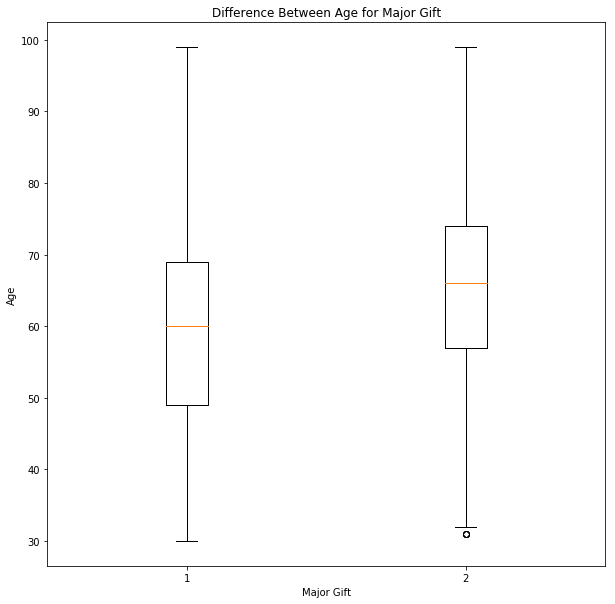

In [12]:
# explore relationship between Age and MajorGiftProspect

plt.figure(figsize=(10,10))
satBoxPlt = [majorGift0.Age, majorGift1.Age]
plt.boxplot(satBoxPlt)
plt.xlabel('Major Gift')
plt.ylabel('Age')
plt.title('Difference Between Age for Major Gift')

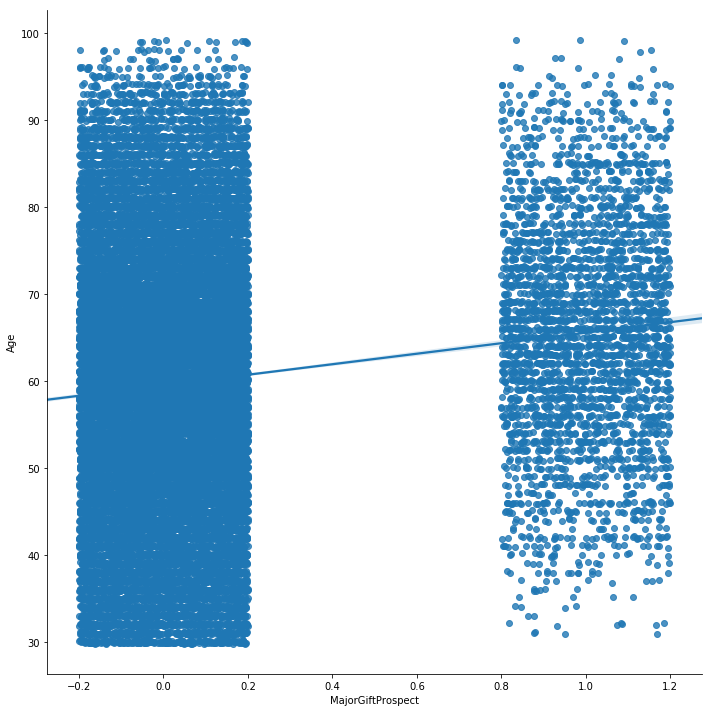

In [13]:
# explore relationship between Age and MajorGiftProspect

sns.lmplot("MajorGiftProspect", "Age", data=prospect, y_jitter=0.20, x_jitter=.20, size=10, aspect=1)

In [14]:
# test if Age is normally distributed
AgeNormalTest = stats.normaltest(prospect['Age'])

print "The chi-square statistic is %.3f and the p-value is %.3f." % AgeNormalTest

The chi-square statistic is 765.480 and the p-value is 0.000.


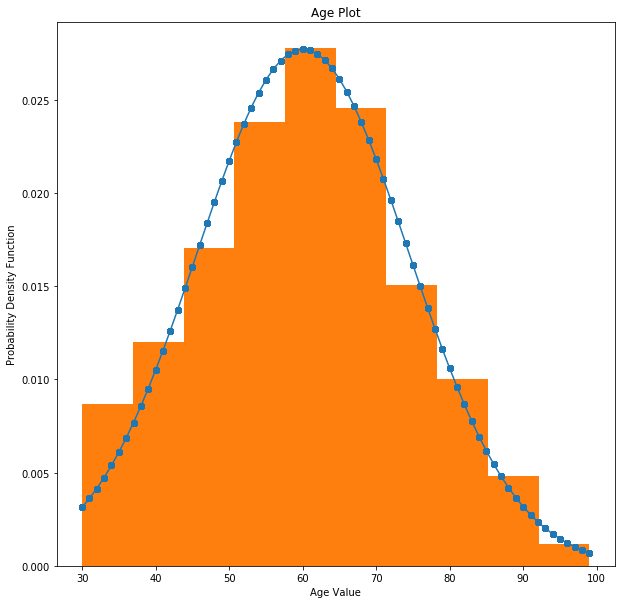

In [15]:
# plot a histogram to visualize if Age is normally distributed

plt.figure(figsize=(10,10))
h = sorted(prospect['Age'])
fit = stats.norm.pdf(h, np.mean(h), np.std(h))
plt.plot(h,fit,'-o')
plt.hist(h,normed=True)
plt.xlabel('Age Value')
plt.ylabel('Probability Density Function')
plt.title('Age Plot')

In [16]:
# test if there is a significant difference in the mean of Age for those that are already classified as
# major gift prospects and those that are not

NotMajorGift = prospect[prospect['MajorGiftProspect'] == 0]['Age']
YesMajorGift = prospect[prospect['MajorGiftProspect'] == 1]['Age']
print stats.ttest_ind(NotMajorGift, YesMajorGift)
AgeTwo_sample = stats.ttest_ind(NotMajorGift, YesMajorGift)
print "The t-statistic is %.3f and the p-value is %.3f." % AgeTwo_sample
print ""
print pairwise_tukeyhsd(prospect['Age'], prospect['MajorGiftProspect'])

Ttest_indResult(statistic=-22.82620093737858, pvalue=1.7187840080176209e-114)
The t-statistic is -22.826 and the p-value is 0.000.

Multiple Comparison of Means - Tukey HSD,FWER=0.05
group1 group2 meandiff lower  upper  reject
-------------------------------------------
  0      1     6.0416  5.5229 6.5604  True 
-------------------------------------------


### StudentOrg

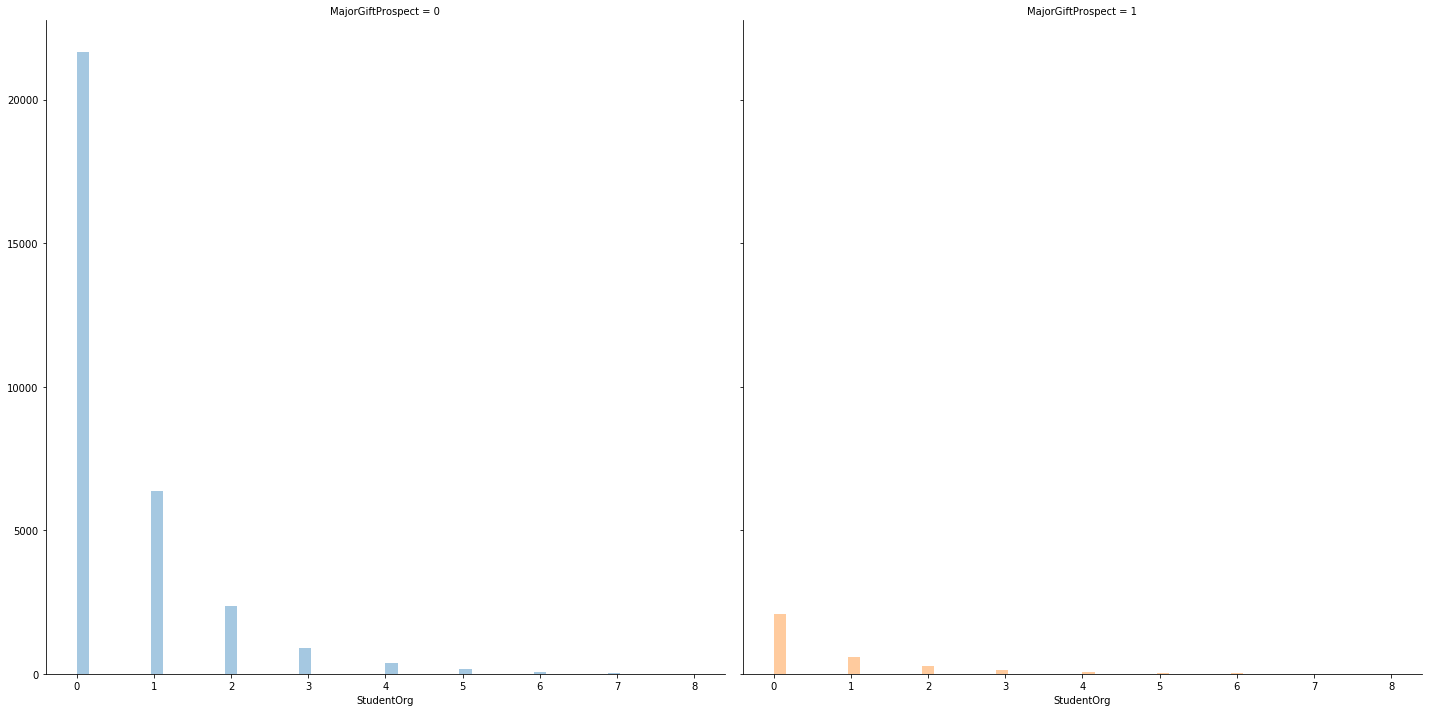

In [17]:
# explore relationship between StudentOrg and MajorGiftProspect

g = sns.FacetGrid(prospect, col='MajorGiftProspect', hue='MajorGiftProspect', size=10, aspect=1) 
g.map(sns.distplot, 'StudentOrg', kde = False)

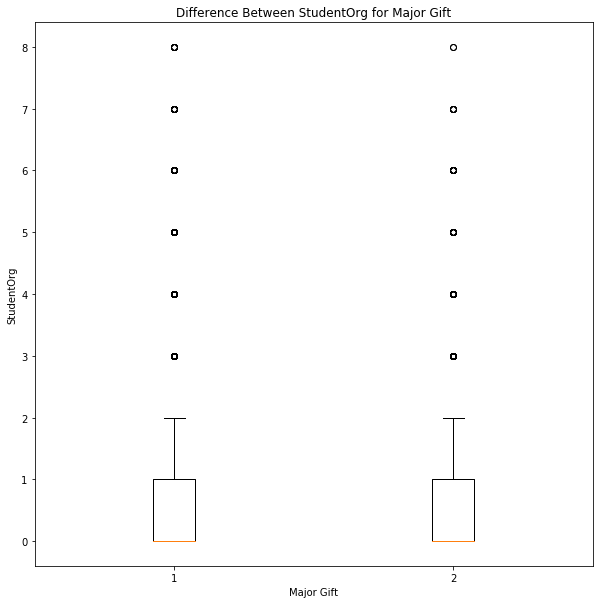

In [18]:
# explore relationship between StudentOrg and MajorGiftProspect

plt.figure(figsize=(10,10))
satBoxPlt = [majorGift0.StudentOrg, majorGift1.StudentOrg]
plt.boxplot(satBoxPlt)
plt.xlabel('Major Gift')
plt.ylabel('StudentOrg')
plt.title('Difference Between StudentOrg for Major Gift')

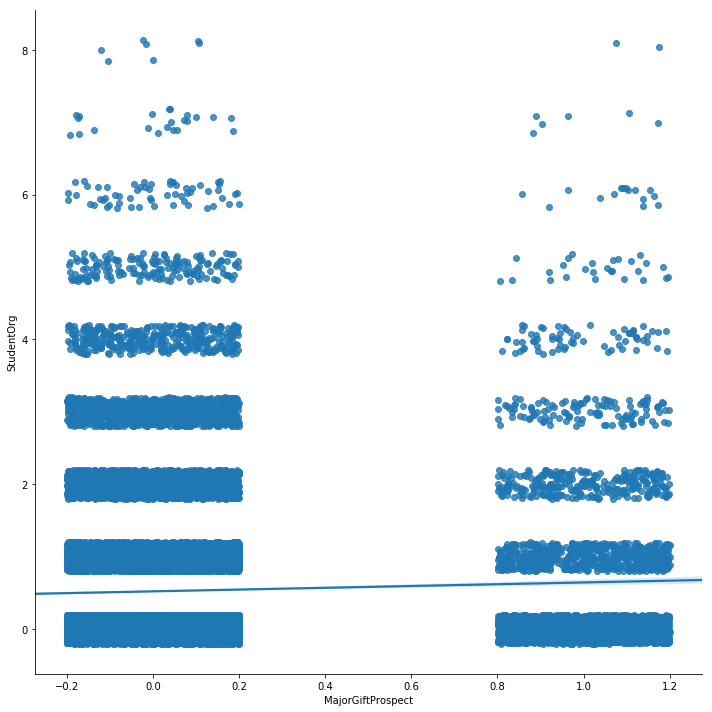

In [19]:
# explore relationship between StudentOrg and MajorGiftProspect

sns.lmplot("MajorGiftProspect", "StudentOrg", data=prospect, y_jitter=0.20, x_jitter=.20, size=10, aspect=1)

In [20]:
# test if StudentOrg is normally distributed
StudentOrgNormalTest = stats.normaltest(prospect['StudentOrg'])

print "The chi-square statistic is %.3f and the p-value is %.3f." % StudentOrgNormalTest

The chi-square statistic is 18256.950 and the p-value is 0.000.


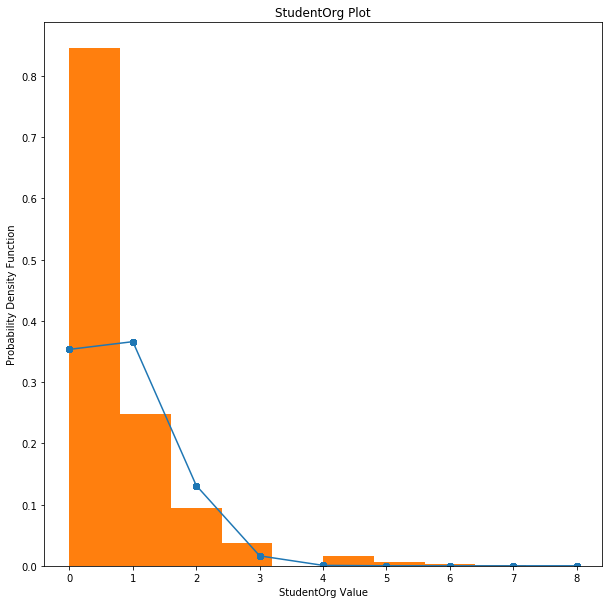

In [21]:
# plot a histogram to visualize if StudentOrg is normally distributed

plt.figure(figsize=(10,10))
h = sorted(prospect['StudentOrg'])
fit = stats.norm.pdf(h, np.mean(h), np.std(h))
plt.plot(h,fit,'-o')
plt.hist(h,normed=True)
plt.xlabel('StudentOrg Value')
plt.ylabel('Probability Density Function')
plt.title('StudentOrg Plot')

In [22]:
# test if there is a significant difference in the mean of StudentOrg for those that are already classified as
# major gift prospects and those that are not

NotMajorGift = prospect[prospect['MajorGiftProspect'] == 0]['StudentOrg']
YesMajorGift = prospect[prospect['MajorGiftProspect'] == 1]['StudentOrg']
print stats.ttest_ind(NotMajorGift, YesMajorGift)
StudentOrgTwo_sample = stats.ttest_ind(NotMajorGift, YesMajorGift)
print "The t-statistic is %.3f and the p-value is %.3f." % StudentOrgTwo_sample
print ""
print pairwise_tukeyhsd(prospect['StudentOrg'], prospect['MajorGiftProspect'])

Ttest_indResult(statistic=-6.8378851647313823, pvalue=8.168352181059819e-12)
The t-statistic is -6.838 and the p-value is 0.000.

Multiple Comparison of Means - Tukey HSD,FWER=0.05
group1 group2 meandiff lower  upper  reject
-------------------------------------------
  0      1     0.1229  0.0877 0.1581  True 
-------------------------------------------


### Volunteer

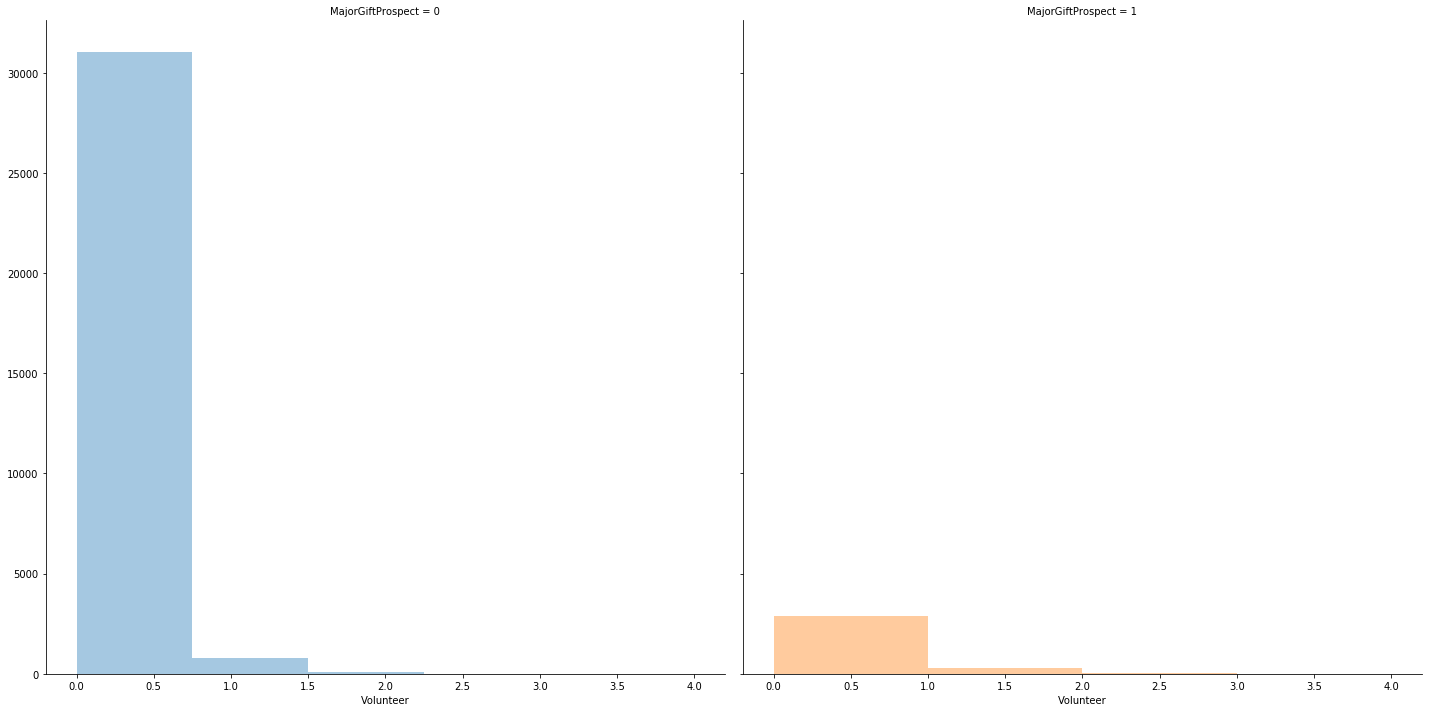

In [23]:
# explore relationship between Volunteer and MajorGiftProspect

g = sns.FacetGrid(prospect, col='MajorGiftProspect', hue='MajorGiftProspect', size=10, aspect=1) 
g.map(sns.distplot, 'Volunteer', kde = False, bins = 4)

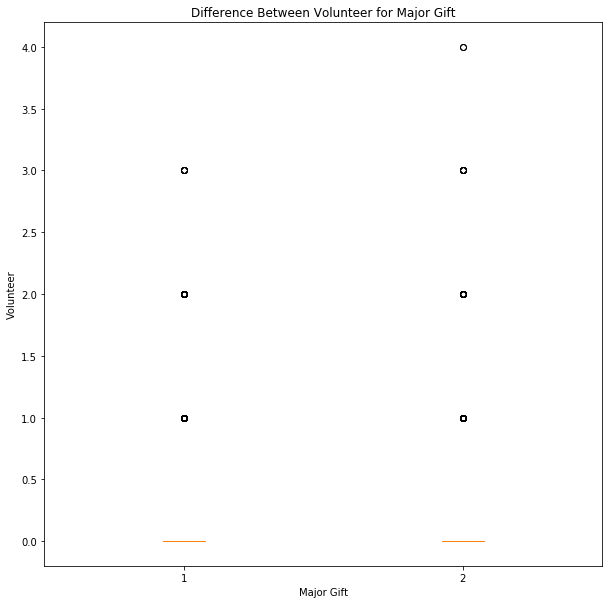

In [24]:
# explore relationship between Volunteer and MajorGiftProspect

plt.figure(figsize=(10,10))
satBoxPlt = [majorGift0.Volunteer, majorGift1.Volunteer]
plt.boxplot(satBoxPlt)
plt.xlabel('Major Gift')
plt.ylabel('Volunteer')
plt.title('Difference Between Volunteer for Major Gift')

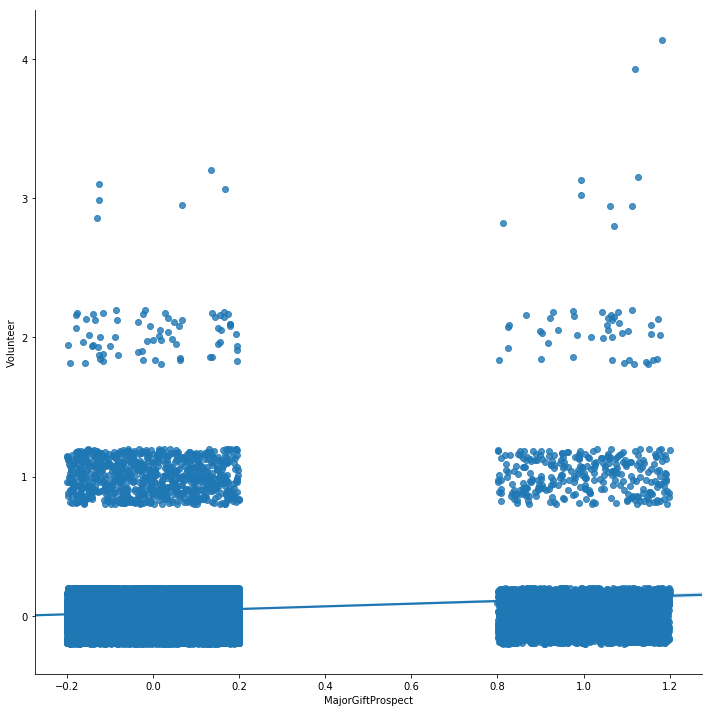

In [25]:
# explore relationship between Volunteer and MajorGiftProspect

sns.lmplot("MajorGiftProspect", "Volunteer", data=prospect, y_jitter=0.20, x_jitter=.20, size=10, aspect=1)

In [26]:
# test if Volunteer is normally distributed
VolunteerNormalTest = stats.normaltest(prospect['Volunteer'])

print "The chi-square statistic is %.3f and the p-value is %.3f." % VolunteerNormalTest

The chi-square statistic is 41672.325 and the p-value is 0.000.


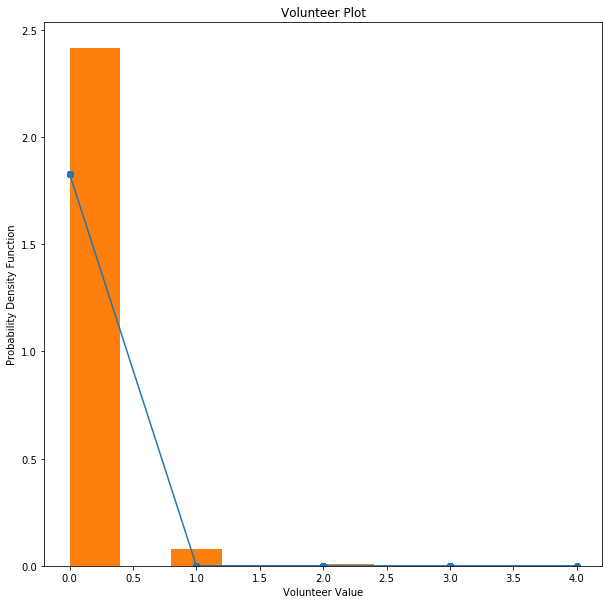

In [27]:
# plot a histogram to visualize if Volunteer is normally distributed

plt.figure(figsize=(10,10))
h = sorted(prospect['Volunteer'])
fit = stats.norm.pdf(h, np.mean(h), np.std(h))
plt.plot(h,fit,'-o')
plt.hist(h,normed=True)
plt.xlabel('Volunteer Value')
plt.ylabel('Probability Density Function')
plt.title('Volunteer Plot')

In [28]:
# test if there is a significant difference in the mean of Volunteer for those that are already classified as
# major gift prospects and those that are not

NotMajorGift = prospect[prospect['MajorGiftProspect'] == 0]['Volunteer']
YesMajorGift = prospect[prospect['MajorGiftProspect'] == 1]['Volunteer']
print stats.ttest_ind(NotMajorGift, YesMajorGift)
VolunteerTwo_sample = stats.ttest_ind(NotMajorGift, YesMajorGift)
print "The t-statistic is %.3f and the p-value is %.3f." % VolunteerTwo_sample
print ""
print pairwise_tukeyhsd(prospect['Volunteer'], prospect['MajorGiftProspect'])

Ttest_indResult(statistic=-24.084870933897434, pvalue=3.8778759479537777e-127)
The t-statistic is -24.085 and the p-value is 0.000.

Multiple Comparison of Means - Tukey HSD,FWER=0.05
group1 group2 meandiff lower  upper  reject
-------------------------------------------
  0      1     0.0951  0.0873 0.1028  True 
-------------------------------------------


### Affiliations

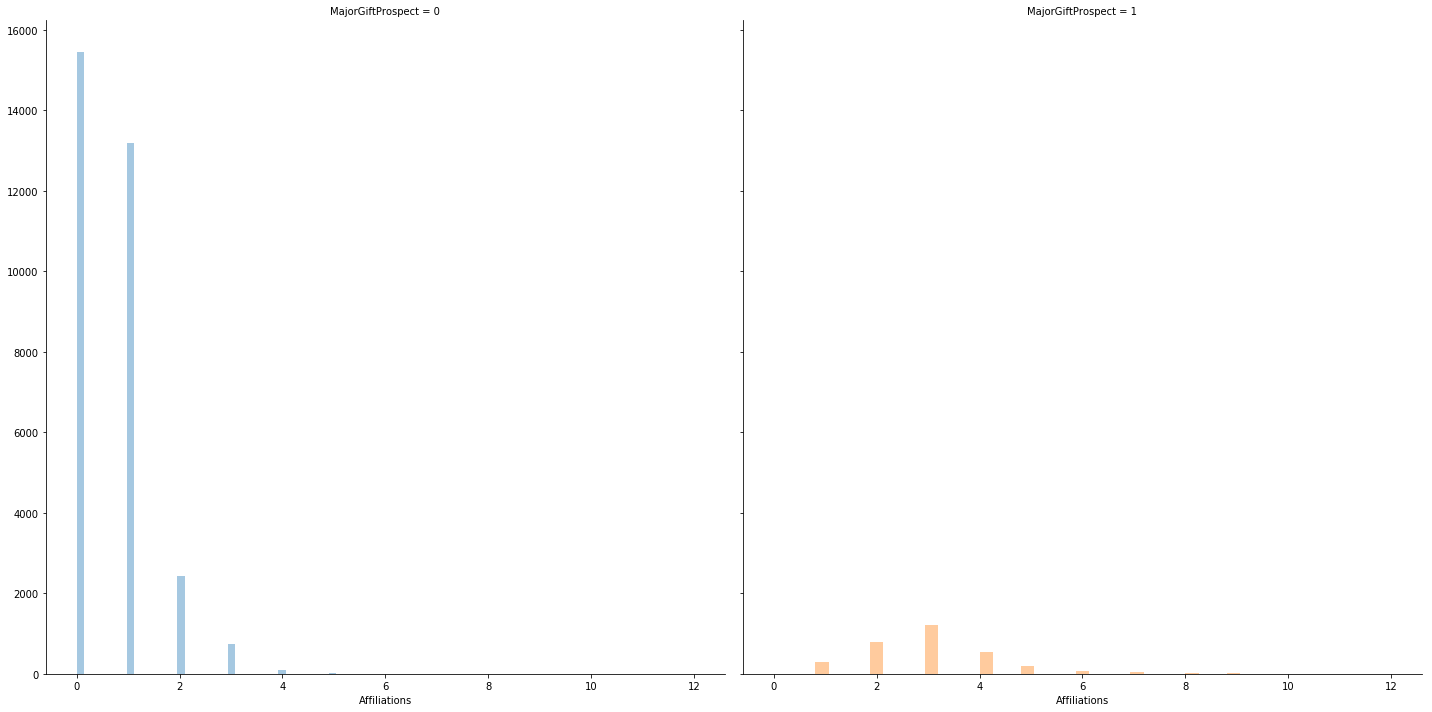

In [29]:
# explore relationship between Affiliations and MajorGiftProspect

g = sns.FacetGrid(prospect, col='MajorGiftProspect', hue='MajorGiftProspect', size=10, aspect=1) 
g.map(sns.distplot, 'Affiliations', kde = False)

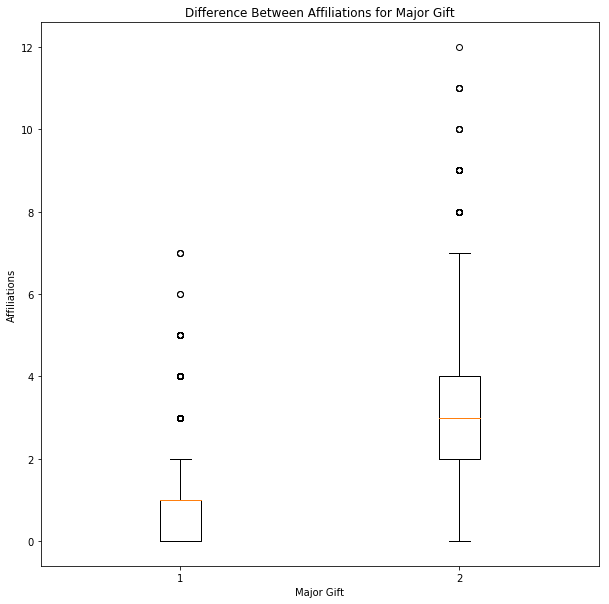

In [30]:
# explore relationship between Affiliations and MajorGiftProspect

plt.figure(figsize=(10,10))
satBoxPlt = [majorGift0.Affiliations, majorGift1.Affiliations]
plt.boxplot(satBoxPlt)
plt.xlabel('Major Gift')
plt.ylabel('Affiliations')
plt.title('Difference Between Affiliations for Major Gift')

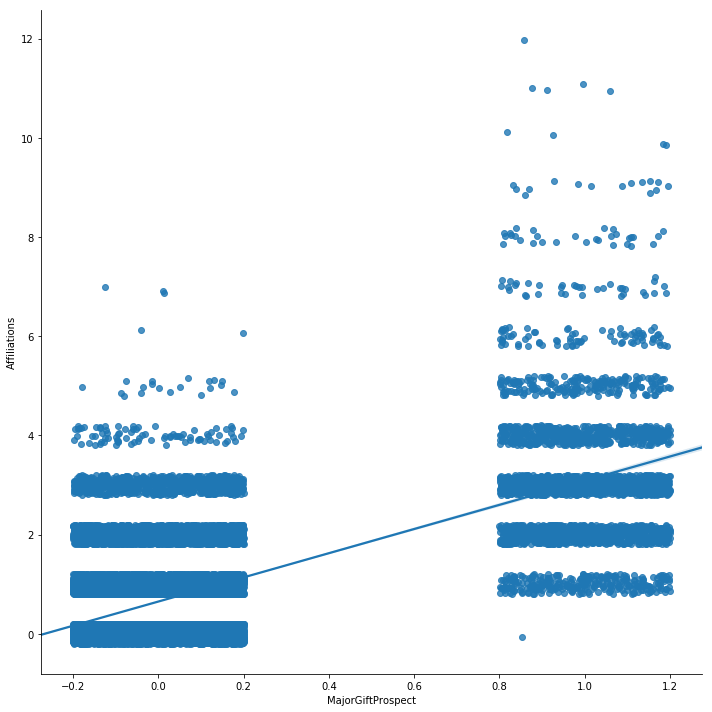

In [31]:
# explore relationship between Affiliations and MajorGiftProspect

sns.lmplot("MajorGiftProspect", "Affiliations", data=prospect, y_jitter=0.20, x_jitter=.20, size=10, aspect=1)

In [32]:
# test if Affiliations is normally distributed
AffiliationsNormalTest = stats.normaltest(prospect['Affiliations'])

print "The chi-square statistic is %.3f and the p-value is %.3f." % AffiliationsNormalTest

The chi-square statistic is 16041.183 and the p-value is 0.000.


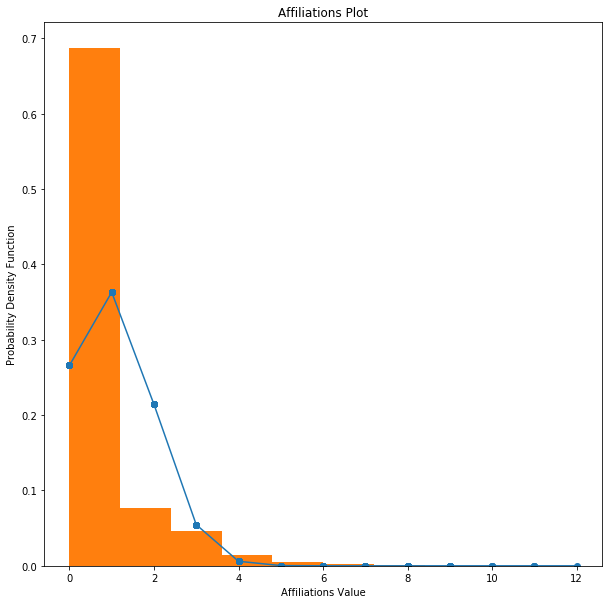

In [33]:
# plot a histogram to visualize if Affiliations is normally distributed

plt.figure(figsize=(10,10))
h = sorted(prospect['Affiliations'])
fit = stats.norm.pdf(h, np.mean(h), np.std(h))
plt.plot(h,fit,'-o')
plt.hist(h,normed=True)
plt.xlabel('Affiliations Value')
plt.ylabel('Probability Density Function')
plt.title('Affiliations Plot')

In [34]:
# test if there is a significant difference in the mean of Affiliations for those that are already classified as
# major gift prospects and those that are not

NotMajorGift = prospect[prospect['MajorGiftProspect'] == 0]['Affiliations']
YesMajorGift = prospect[prospect['MajorGiftProspect'] == 1]['Affiliations']
print stats.ttest_ind(NotMajorGift, YesMajorGift)
AffiliationsTwo_sample = stats.ttest_ind(NotMajorGift, YesMajorGift)
print "The t-statistic is %.3f and the p-value is %.3f." % AffiliationsTwo_sample
print ""
print pairwise_tukeyhsd(prospect['Affiliations'], prospect['MajorGiftProspect'])

Ttest_indResult(statistic=-157.36330199059688, pvalue=0.0)
The t-statistic is -157.363 and the p-value is 0.000.

Multiple Comparison of Means - Tukey HSD,FWER=0.05
group1 group2 meandiff lower  upper  reject
-------------------------------------------
  0      1     2.4371  2.4067 2.4675  True 
-------------------------------------------


### EventCount

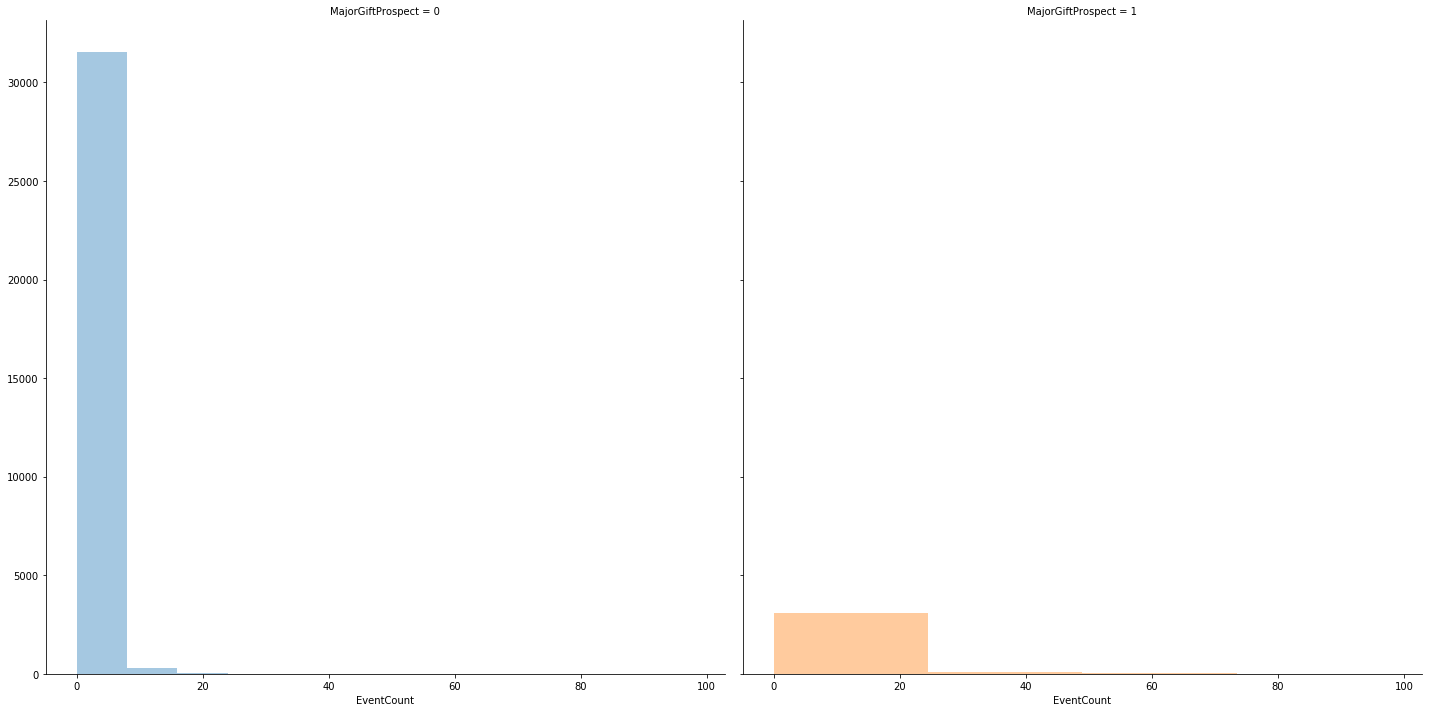

In [35]:
# explore relationship between EventCount and MajorGiftProspect

g = sns.FacetGrid(prospect, col='MajorGiftProspect', hue='MajorGiftProspect', size=10, aspect=1) 
g.map(sns.distplot, 'EventCount', kde = False, bins=4)

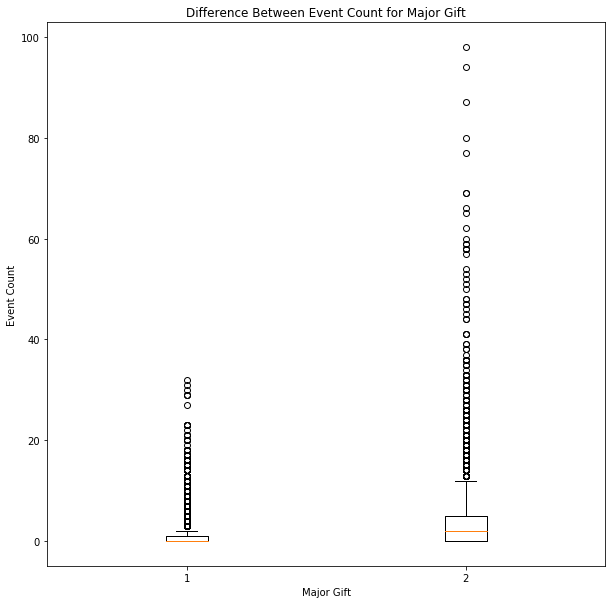

In [36]:
# explore relationship between Affiliations and MajorGiftProspect

plt.figure(figsize=(10,10))
satBoxPlt = [majorGift0.EventCount, majorGift1.EventCount]
plt.boxplot(satBoxPlt)
plt.xlabel('Major Gift')
plt.ylabel('Event Count')
plt.title('Difference Between Event Count for Major Gift')

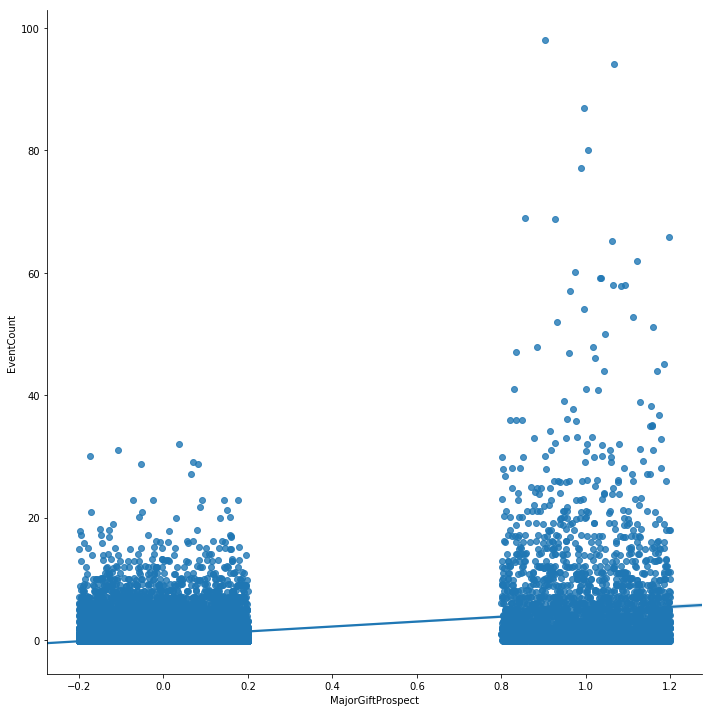

In [37]:
# explore relationship between EventCount and MajorGiftProspect

sns.lmplot("MajorGiftProspect", "EventCount", data=prospect, y_jitter=0.20, x_jitter=.20, size=10, aspect=1)

In [38]:
# test if EventCount is normally distributed
EventCountNormalTest = stats.normaltest(prospect['EventCount'])

print "The chi-square statistic is %.3f and the p-value is %.3f." % EventCountNormalTest

The chi-square statistic is 54905.163 and the p-value is 0.000.


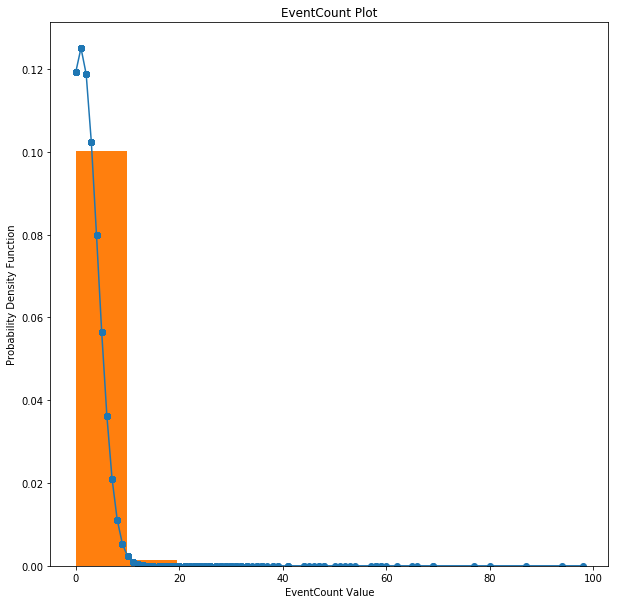

In [39]:
# plot a histogram to visualize if EventCount is normally distributed

plt.figure(figsize=(10,10))
h = sorted(prospect['EventCount'])
fit = stats.norm.pdf(h, np.mean(h), np.std(h))
plt.plot(h,fit,'-o')
plt.hist(h,normed=True)
plt.xlabel('EventCount Value')
plt.ylabel('Probability Density Function')
plt.title('EventCount Plot')

In [40]:
# test if there is a significant difference in the mean of AvgGivingLast5Yrs for those that are already classified as
# major gift prospects and those that are not

NotMajorGift = prospect[prospect['MajorGiftProspect'] == 0]['EventCount']
YesMajorGift = prospect[prospect['MajorGiftProspect'] == 1]['EventCount']
print stats.ttest_ind(NotMajorGift, YesMajorGift)
EventCountTwo_sample = stats.ttest_ind(NotMajorGift, YesMajorGift)
print "The t-statistic is %.3f and the p-value is %.3f." % EventCountTwo_sample
print ""
print pairwise_tukeyhsd(prospect['EventCount'], prospect['MajorGiftProspect'])

Ttest_indResult(statistic=-72.902047203560045, pvalue=0.0)
The t-statistic is -72.902 and the p-value is 0.000.

Multiple Comparison of Means - Tukey HSD,FWER=0.05
group1 group2 meandiff lower  upper  reject
-------------------------------------------
  0      1     4.0161  3.9081 4.1241  True 
-------------------------------------------


### The findings from the descriptive analysis, data visualization, and significant difference testing has concluded that we should reject our null hypothesis that the number of events do not affect the likelihood that a prospect should be consider a major gift prospect.

### AvgGivingLast5Yrs

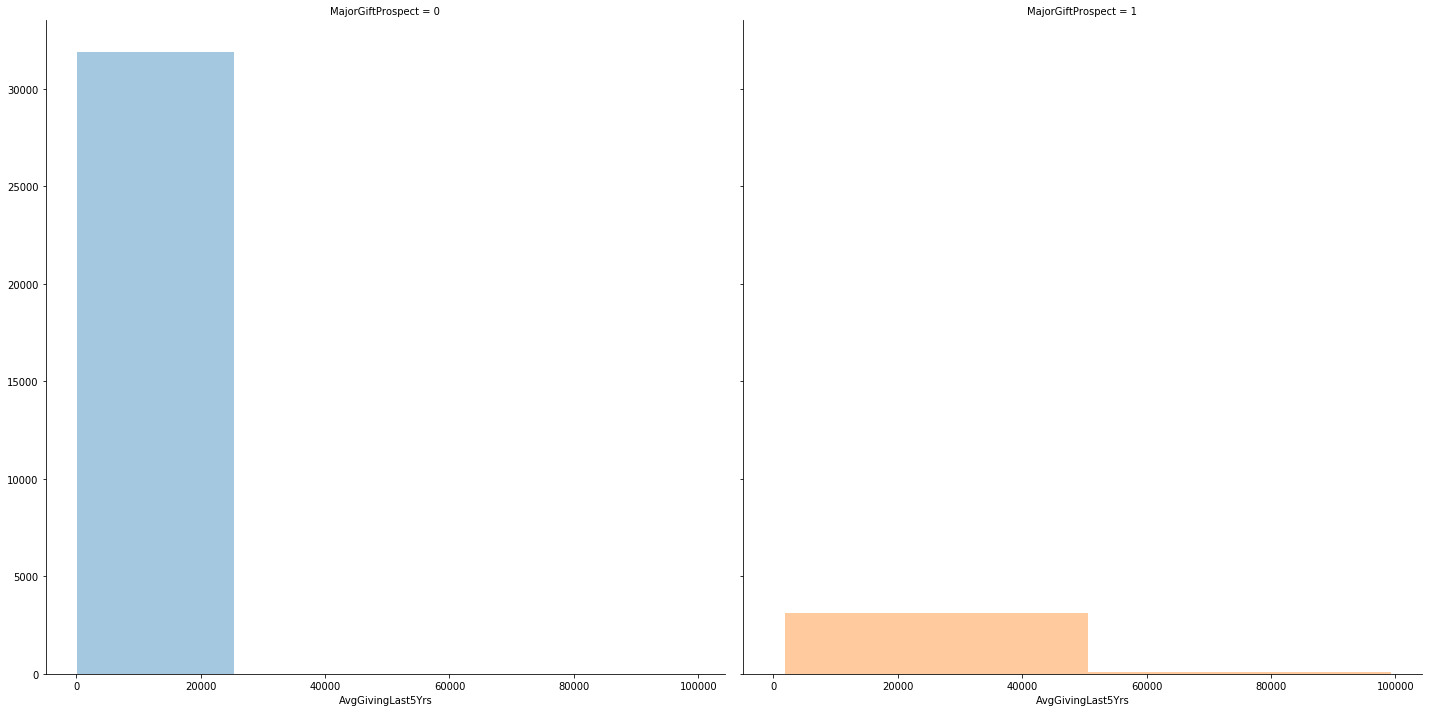

In [41]:
# explore relationship between AvgGivingLast5Yrs and MajorGiftProspect

g = sns.FacetGrid(prospect, col='MajorGiftProspect', hue='MajorGiftProspect', size=10, aspect=1) 
g.map(sns.distplot, 'AvgGivingLast5Yrs', kde = False, bins = 2)

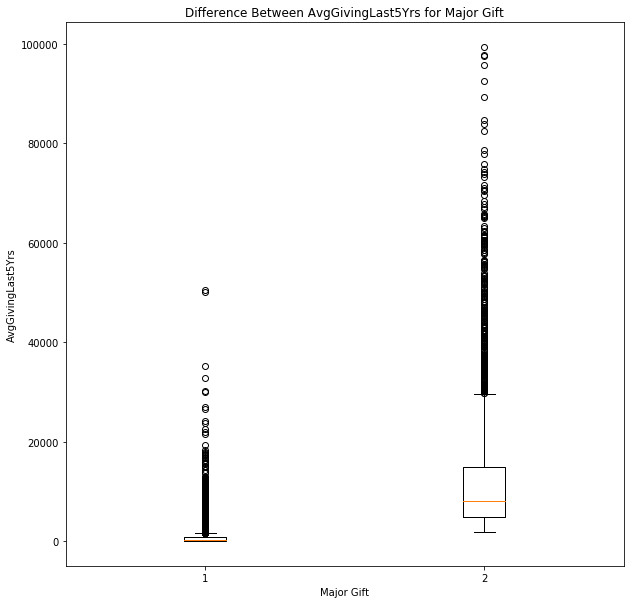

In [42]:
# explore relationship between AvgGivingLast5Yrs and MajorGiftProspect

plt.figure(figsize=(10,10))
satBoxPlt = [majorGift0.AvgGivingLast5Yrs, majorGift1.AvgGivingLast5Yrs]
plt.boxplot(satBoxPlt)
plt.xlabel('Major Gift')
plt.ylabel('AvgGivingLast5Yrs')
plt.title('Difference Between AvgGivingLast5Yrs for Major Gift')

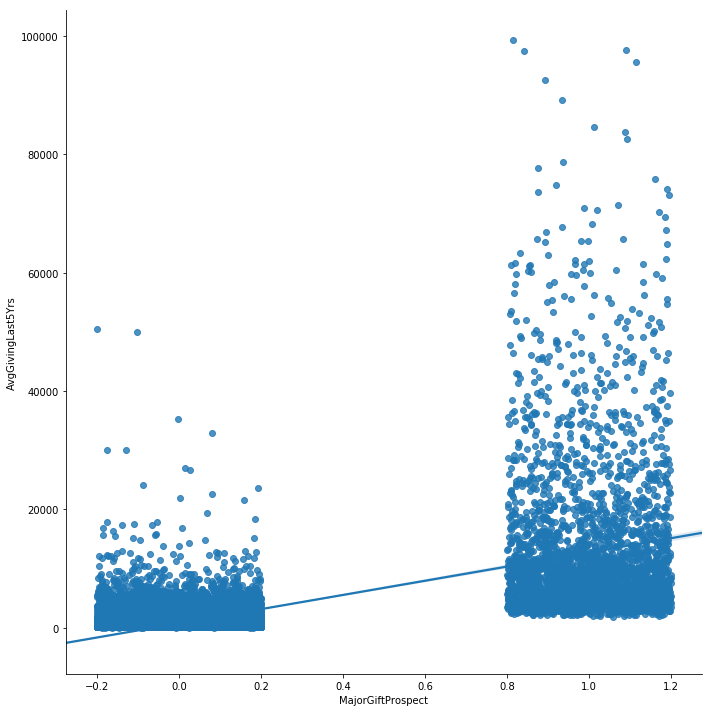

In [43]:
# explore relationship between AvgGivingLast5Yrs and MajorGiftProspect

sns.lmplot("MajorGiftProspect", "AvgGivingLast5Yrs", data=prospect, y_jitter=0.20, x_jitter=.20, size=10, aspect=1)

In [44]:
# test if the data is normally distributed
AvgGivingLast5YrsNormalTest = stats.normaltest(prospect['AvgGivingLast5Yrs'])

print "The chi-square statistic is %.3f and the p-value is %.3f." % AvgGivingLast5YrsNormalTest

The chi-square statistic is 45316.861 and the p-value is 0.000.


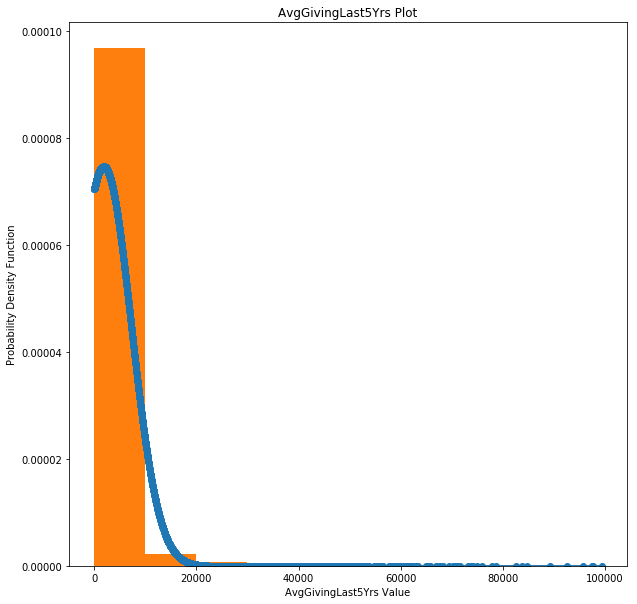

In [45]:
# plot a histogram to visualize if satisfaction is normally distributed

plt.figure(figsize=(10,10))
h = sorted(prospect['AvgGivingLast5Yrs'])
fit = stats.norm.pdf(h, np.mean(h), np.std(h))
plt.plot(h,fit,'-o')
plt.hist(h,normed=True)
plt.xlabel('AvgGivingLast5Yrs Value')
plt.ylabel('Probability Density Function')
plt.title('AvgGivingLast5Yrs Plot')

In [46]:
# test if there is a significant difference in the mean of AvgGivingLast5Yrs for those that are already classified as
# major gift prospects and those that are not

NotMajorGift = prospect[prospect['MajorGiftProspect'] == 0]['AvgGivingLast5Yrs']
YesMajorGift = prospect[prospect['MajorGiftProspect'] == 1]['AvgGivingLast5Yrs']
print stats.ttest_ind(NotMajorGift, YesMajorGift)
AvgGivingLast5YrsTwo_sample = stats.ttest_ind(NotMajorGift, YesMajorGift)
print "The t-statistic is %.3f and the p-value is %.3f." % AvgGivingLast5YrsTwo_sample
print ""
print pairwise_tukeyhsd(prospect['AvgGivingLast5Yrs'], prospect['MajorGiftProspect'])

Ttest_indResult(statistic=-158.85771607828752, pvalue=0.0)
The t-statistic is -158.858 and the p-value is 0.000.

  Multiple Comparison of Means - Tukey HSD,FWER=0.05 
group1 group2  meandiff    lower      upper    reject
-----------------------------------------------------
  0      1    11998.9826 11850.9357 12147.0294  True 
-----------------------------------------------------


### GiftCount

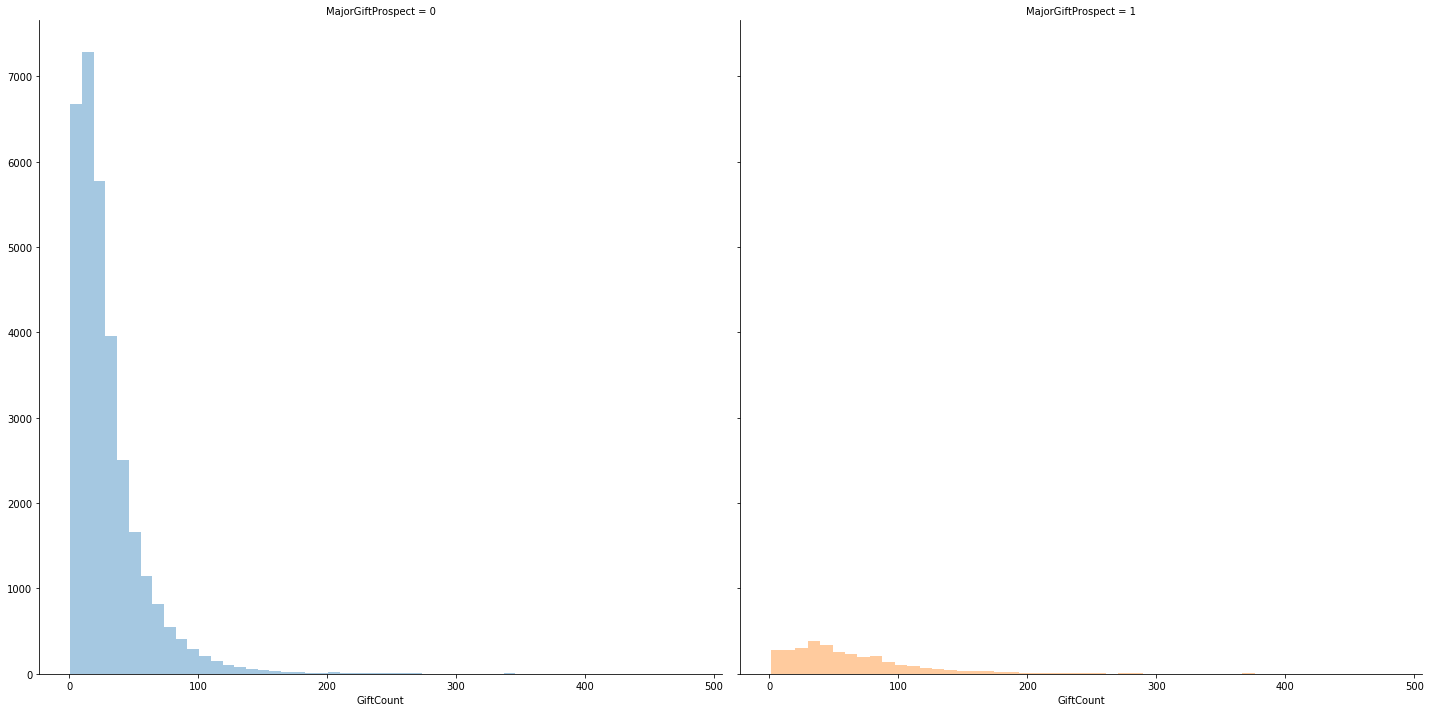

In [47]:
# explore relationship between GiftCount and MajorGiftProspect

g = sns.FacetGrid(prospect, col='MajorGiftProspect', hue='MajorGiftProspect', size=10, aspect=1) 
g.map(sns.distplot, 'GiftCount', kde = False)

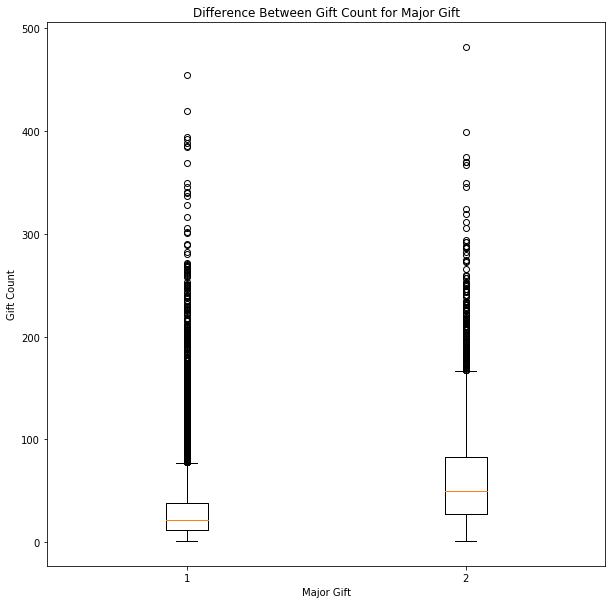

In [48]:
# explore relationship between GiftCount and MajorGiftProspect

plt.figure(figsize=(10,10))
satBoxPlt = [majorGift0.GiftCount, majorGift1.GiftCount]
plt.boxplot(satBoxPlt)
plt.xlabel('Major Gift')
plt.ylabel('Gift Count')
plt.title('Difference Between Gift Count for Major Gift')

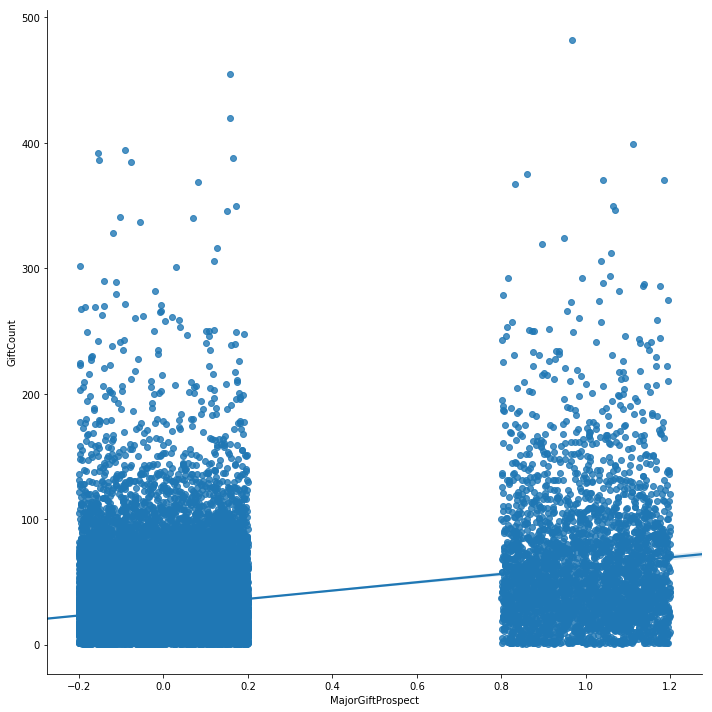

In [49]:
# explore relationship between GiftCount and MajorGiftProspect

sns.lmplot("MajorGiftProspect", "GiftCount", data=prospect, y_jitter=0.20, x_jitter=.20, size=10, aspect=1)

In [50]:
# test if GiftCount is normally distributed
GiftCountNormalTest = stats.normaltest(prospect['GiftCount'])

print "The chi-square statistic is %.3f and the p-value is %.3f." % GiftCountNormalTest

The chi-square statistic is 24622.777 and the p-value is 0.000.


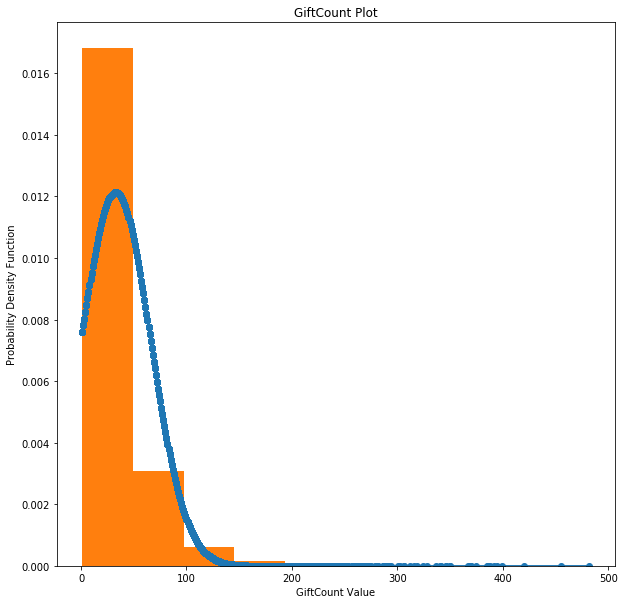

In [51]:
# plot a histogram to visualize if GiftCount is normally distributed

plt.figure(figsize=(10,10))
h = sorted(prospect['GiftCount'])
fit = stats.norm.pdf(h, np.mean(h), np.std(h))
plt.plot(h,fit,'-o')
plt.hist(h,normed=True)
plt.xlabel('GiftCount Value')
plt.ylabel('Probability Density Function')
plt.title('GiftCount Plot')

In [52]:
# test if there is a significant difference in the mean of GiftCount for those that are already classified as
# major gift prospects and those that are not

NotMajorGift = prospect[prospect['MajorGiftProspect'] == 0]['GiftCount']
YesMajorGift = prospect[prospect['MajorGiftProspect'] == 1]['GiftCount']
print stats.ttest_ind(NotMajorGift, YesMajorGift)
GiftCountTwo_sample = stats.ttest_ind(NotMajorGift, YesMajorGift)
print "The t-statistic is %.3f and the p-value is %.3f." % GiftCountTwo_sample
print ""
print pairwise_tukeyhsd(prospect['GiftCount'], prospect['MajorGiftProspect'])

Ttest_indResult(statistic=-56.810998512303847, pvalue=0.0)
The t-statistic is -56.811 and the p-value is 0.000.

Multiple Comparison of Means - Tukey HSD,FWER=0.05
group1 group2 meandiff  lower   upper  reject
---------------------------------------------
  0      1    33.1236  31.9808 34.2664  True 
---------------------------------------------


### CapacityValue

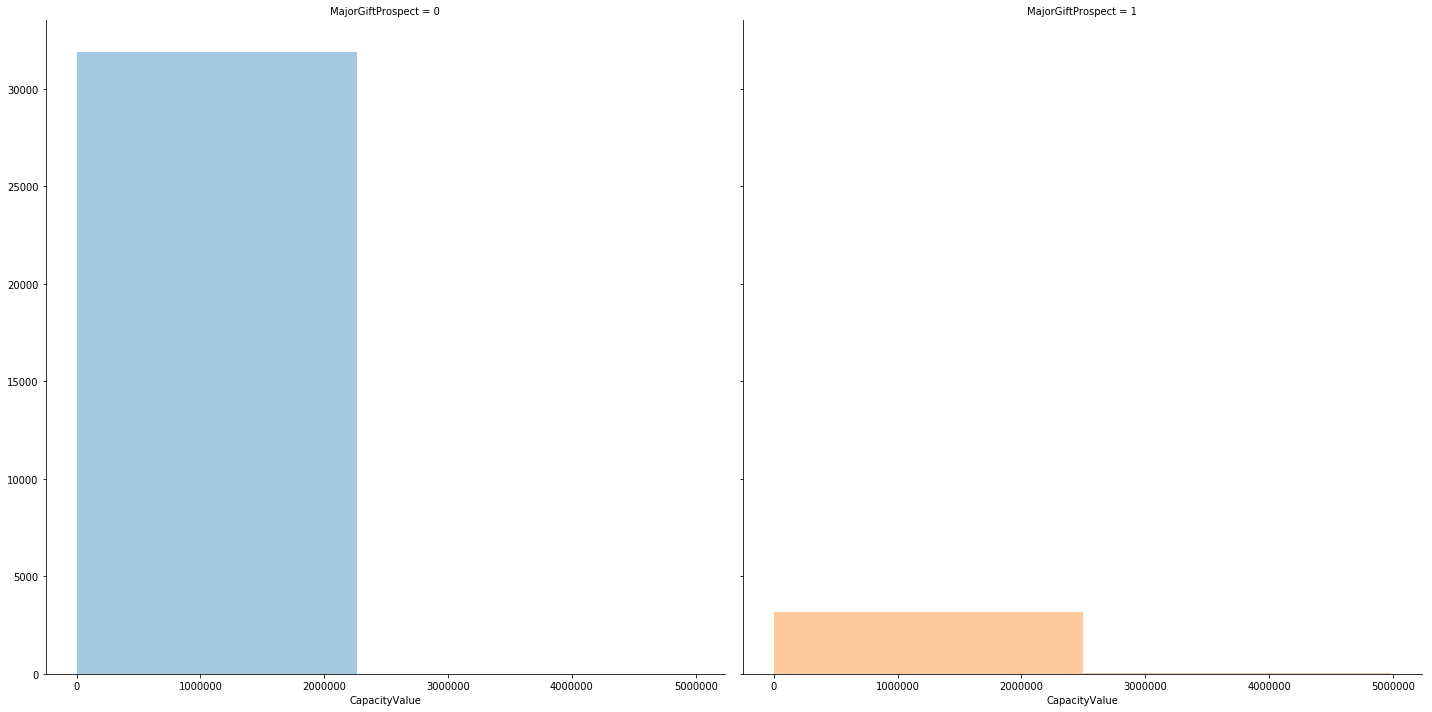

In [53]:
# explore relationship between CapacityValue and MajorGiftProspect

g = sns.FacetGrid(prospect, col='MajorGiftProspect', hue='MajorGiftProspect', size=10, aspect=1) 
g.map(sns.distplot, 'CapacityValue', kde = False, bins = 2)

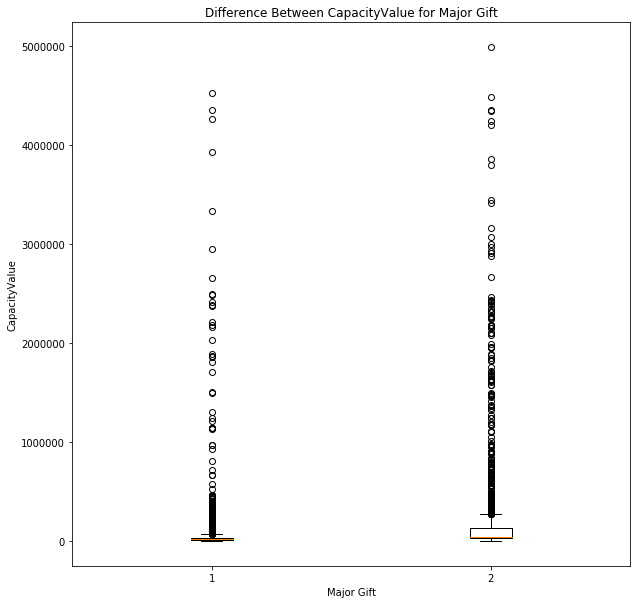

In [54]:
# explore relationship between CapacityValue and MajorGiftProspect

plt.figure(figsize=(10,10))
satBoxPlt = [majorGift0.CapacityValue, majorGift1.CapacityValue]
plt.boxplot(satBoxPlt)
plt.xlabel('Major Gift')
plt.ylabel('CapacityValue')
plt.title('Difference Between CapacityValue for Major Gift')

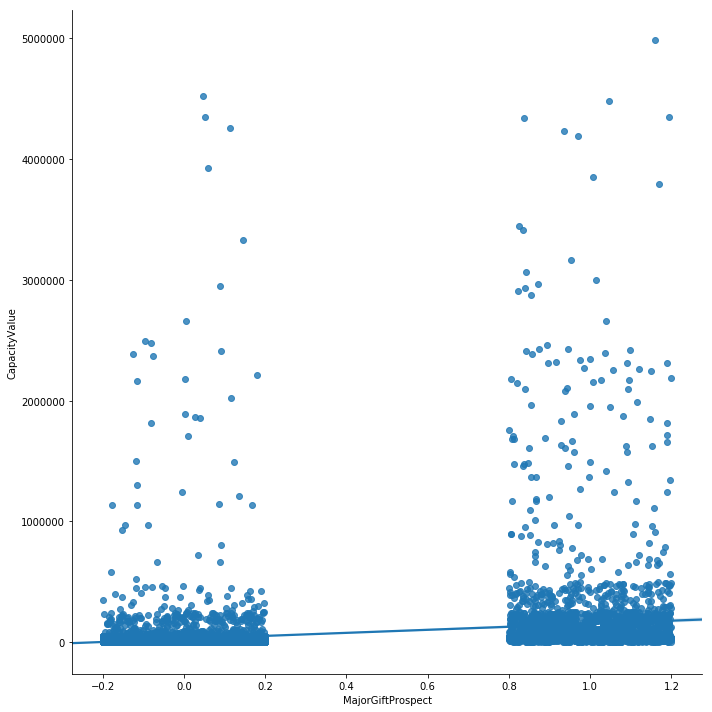

In [55]:
# explore relationship between CapacityValue and MajorGiftProspect

sns.lmplot("MajorGiftProspect", "CapacityValue", data=prospect, y_jitter=0.20, x_jitter=.20, size=10, aspect=1)

In [56]:
# test if CapacityValue is normally distributed
CapacityValueNormalTest = stats.normaltest(prospect['CapacityValue'])

print "The chi-square statistic is %.3f and the p-value is %.3f." % CapacityValueNormalTest

The chi-square statistic is 73212.484 and the p-value is 0.000.


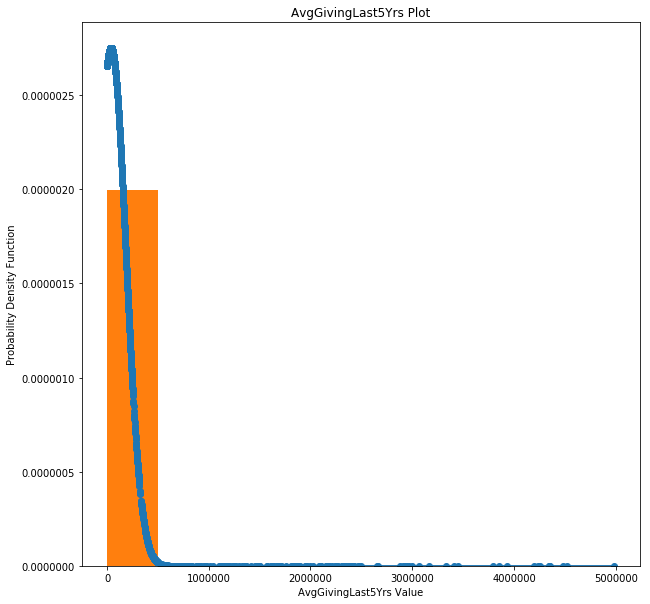

In [57]:
# plot a histogram to visualize if CapacityValue is normally distributed

plt.figure(figsize=(10,10))
h = sorted(prospect['CapacityValue'])
fit = stats.norm.pdf(h, np.mean(h), np.std(h))
plt.plot(h,fit,'-o')
plt.hist(h,normed=True)
plt.xlabel('AvgGivingLast5Yrs Value')
plt.ylabel('Probability Density Function')
plt.title('AvgGivingLast5Yrs Plot')

In [58]:
# test if there is a significant difference in the mean of CapacityValue for those that are already classified as
# major gift prospects and those that are not

NotMajorGift = prospect[prospect['MajorGiftProspect'] == 0]['CapacityValue']
YesMajorGift = prospect[prospect['MajorGiftProspect'] == 1]['CapacityValue']
print stats.ttest_ind(NotMajorGift, YesMajorGift)
CapacityValueTwo_sample = stats.ttest_ind(NotMajorGift, YesMajorGift)
print "The t-statistic is %.3f and the p-value is %.3f." % CapacityValueTwo_sample
print ""
print pairwise_tukeyhsd(prospect['CapacityValue'], prospect['MajorGiftProspect'])

Ttest_indResult(statistic=-48.46771855810335, pvalue=0.0)
The t-statistic is -48.468 and the p-value is 0.000.

   Multiple Comparison of Means - Tukey HSD,FWER=0.05   
group1 group2   meandiff     lower       upper    reject
--------------------------------------------------------
  0      1    126122.5137 121022.1271 131222.9003  True 
--------------------------------------------------------


### The findings from the descriptive analysis, data visualization, and significant difference testing has concluded that we should reject our null hypothesis that the value of the prospects capacity value does not affect the likelihood that a prospect should be consider a major gift prospect.

## Visually explore bi-nominal data differences

### Alumni

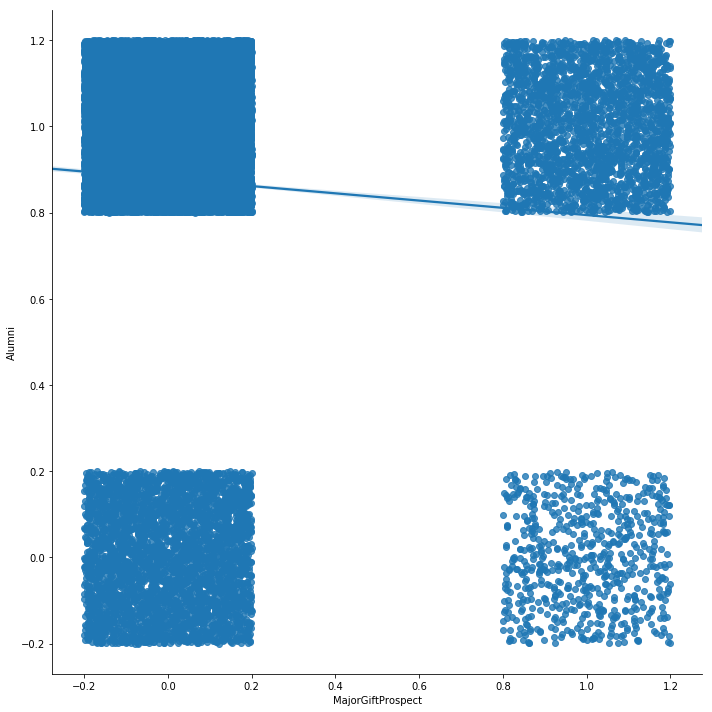

In [59]:
# explore relationship between Alumni and MajorGiftProspect
sns.lmplot("MajorGiftProspect", "Alumni", data=prospect, y_jitter=0.20, x_jitter=.20, size=10, aspect=1)

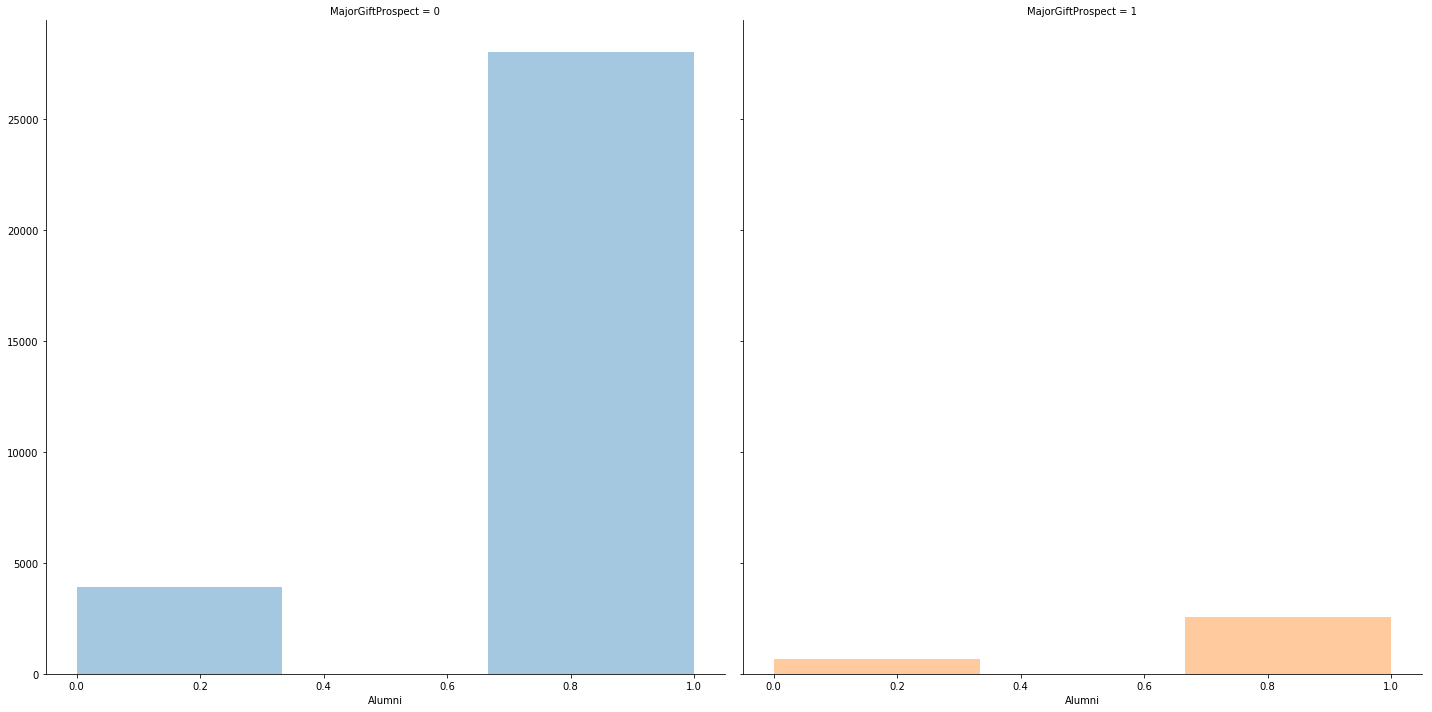

In [60]:
g = sns.FacetGrid(prospect, col='MajorGiftProspect', hue='MajorGiftProspect', size=10, aspect=1) 
g.map(sns.distplot, 'Alumni', kde = False, bins = 3)

### Married to Alum

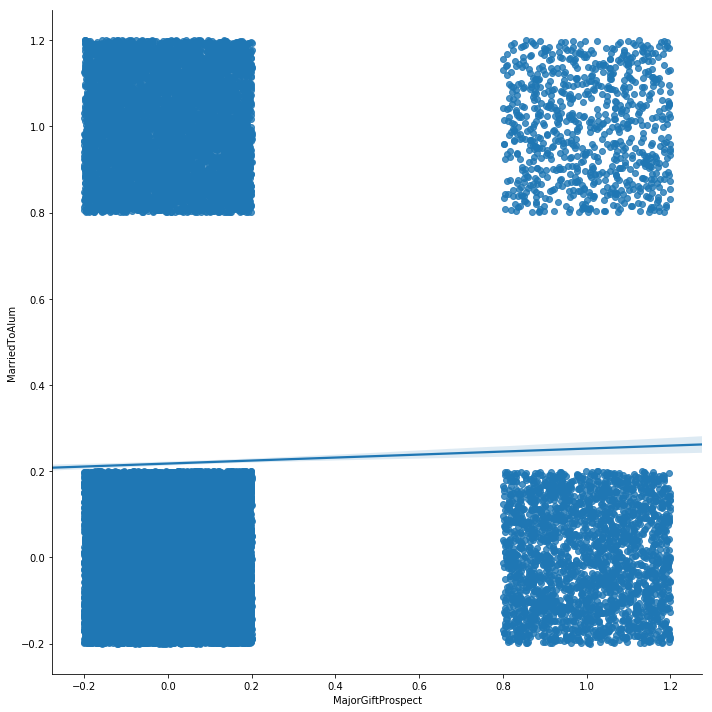

In [61]:
# explore relationship between MarriedToAlum and MajorGiftProspect
sns.lmplot("MajorGiftProspect", "MarriedToAlum", data=prospect, y_jitter=0.20, x_jitter=.20, size=10, aspect=1)

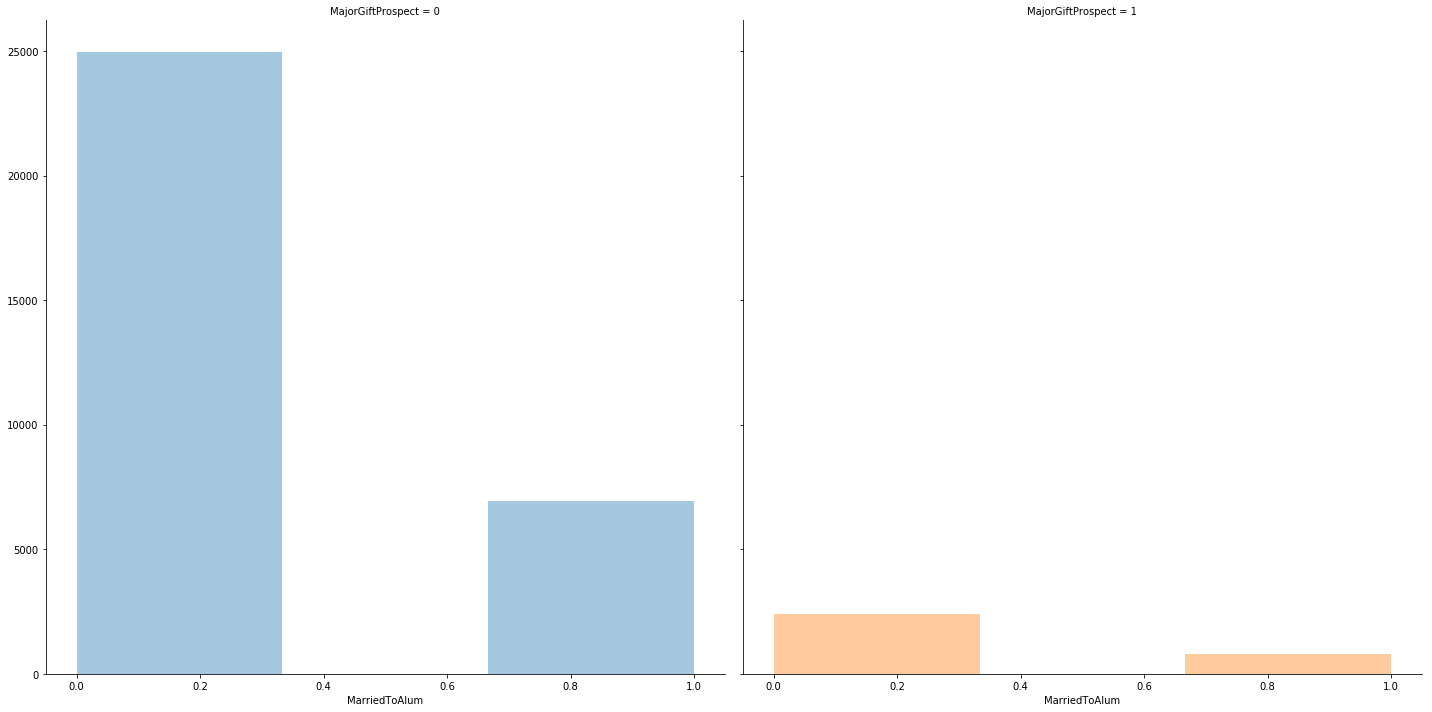

In [62]:
g = sns.FacetGrid(prospect, col='MajorGiftProspect', hue='MajorGiftProspect', size=10, aspect=1) 
g.map(sns.distplot, 'MarriedToAlum', kde = False, bins = 3)

### Now that we have thoroughly examined the dataset and have a firm understanding of the data let’s begin the process of moving from descriptive analytics to predictive analytics.

# Correlation Analysis

### Next we will check to see how stongly correlated the different variables are to each other.

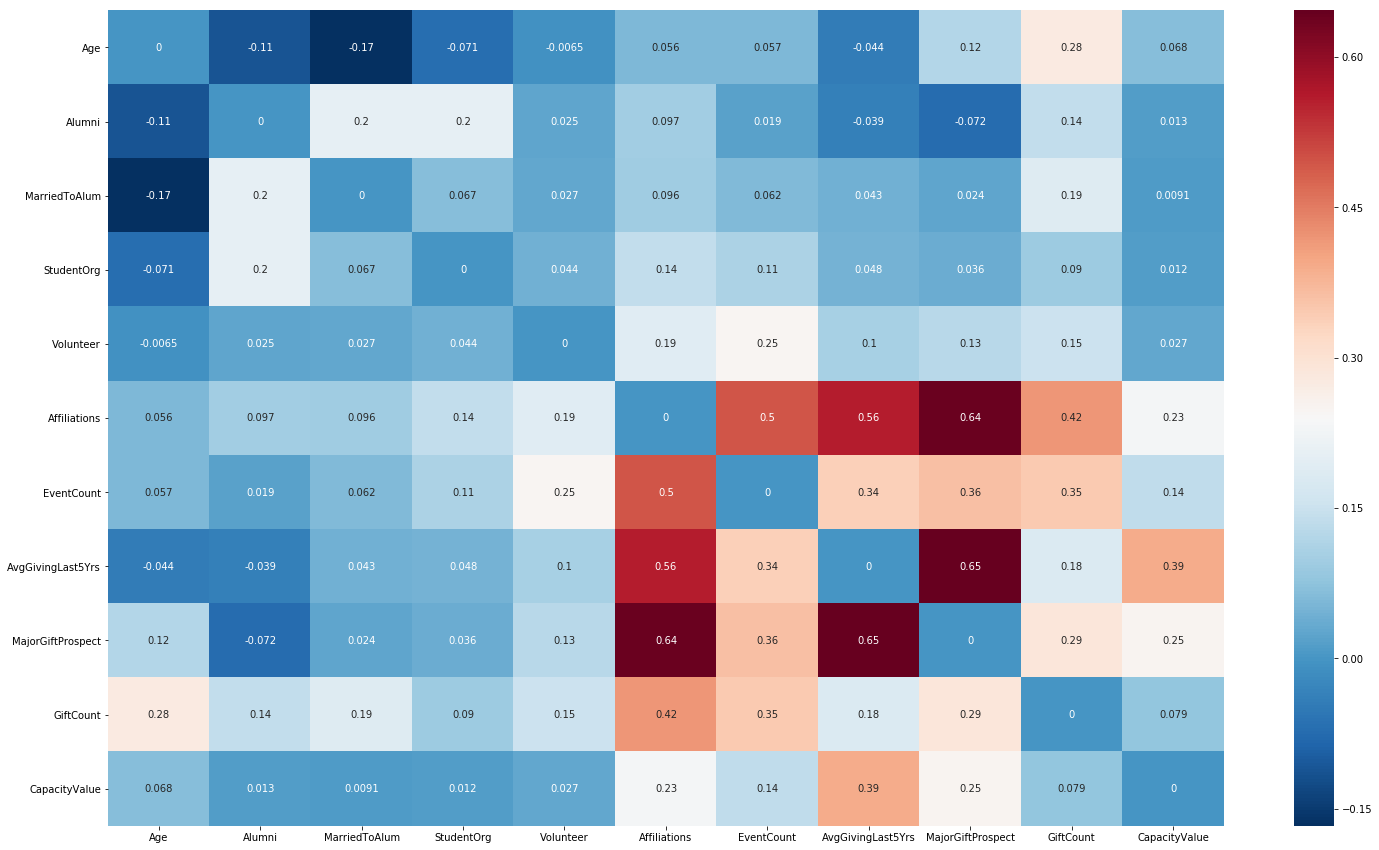

In [63]:
# set self correlation to 0 to make it easier to see strong positive correlations in heatmap
diagCorrs = prospect.corr()
np.fill_diagonal(diagCorrs.values, 0)

# correlation heatmap
plt.figure(figsize=(25,15))
sns.heatmap(diagCorrs, annot=True, cmap="RdBu_r")

### We can see that MajorGiftProspects is moderately correlated with AvgGivingLast5Yrs, Affiliations, and EventCount. We know that prospects in the past were coded as major gift prospects based on thier level of giving to the university already. Let's see if we can predict the value of a prospect based on thier average giving over the past 5 years in order to use the same criteria of coding major gift prospects.

# Regression Modeling

### Before we begin, we need to remove MajorGiftProspect from the dataset in order to reduce multicollineary.

In [64]:
# remove MajorGiftProspect as it is traditionally based on previous giving
prospectRegression = prospect.drop(['MajorGiftProspect'], axis=1)
prospectRegression.head()

Age  Alumni  MarriedToAlum  StudentOrg  Volunteer  Affiliations  \
0   34       1              1           0          0             1   
1   56       1              1           0          0             0   
2   34       1              0           0          0             0   
3   34       1              0           0          0             0   
4   34       1              0           1          0             0   

   EventCount  AvgGivingLast5Yrs  GiftCount  CapacityValue  
0           1               1417          6          21129  
1           1                179         11          22679  
2           0                417          1          22678  
3           0                417          1          17547  
4           0               1333          8          15581

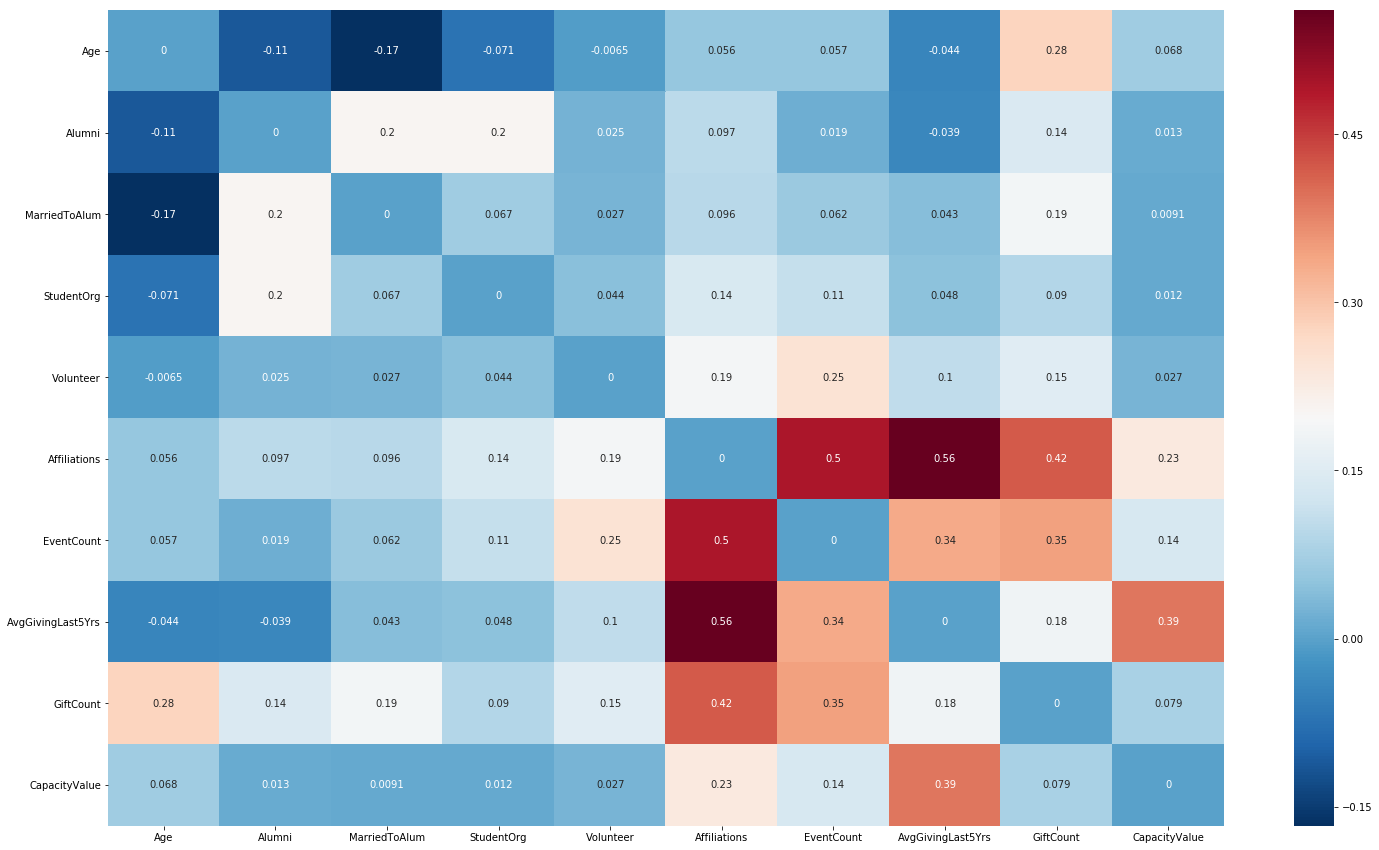

In [65]:
# set self correlation to 0 to make it easier to see strong positive correlations in heatmap
diagCorrs = prospectRegression.corr()
np.fill_diagonal(diagCorrs.values, 0)

# correlation heatmap
plt.figure(figsize=(25,15))
sns.heatmap(diagCorrs, annot=True, cmap="RdBu_r")

### We can see that AvgGivingLast5Yrs is moderately correlated with Affiliations, CapacityValue, and EventCount. We can also note that Affiliations is moderately correlated with EventCount and GiftCount. This may cause an issue in regression analysis but lets attempt to model with the full dataset first.

# Linear Regression

### Next we will assign AvgGivingLast5Yrs to a variable, y, and the rest of the dataset to another variable, X, in order to conduct regression analysis.

In [66]:
#assigning columns to X and Y variables
y = prospectRegression['AvgGivingLast5Yrs'] 
X = prospectRegression.drop(['AvgGivingLast5Yrs'], axis =1)

In [67]:
# create linear regression model
modelFull = lm.LinearRegression()
modelFull.fit(X, y)   
modelFull_y = modelFull.predict(X)
print 'Coefficients: ', modelFull.coef_
print "y-intercept ", modelFull.intercept_

Coefficients:  [ -3.67729588e+01  -1.51696273e+03  -2.90842322e+01  -9.26585988e+01
  -2.09334473e+02   2.39236189e+03   1.27702443e+02  -4.38389360e+00
   1.02335574e-02]
y-intercept  2972.25612751


In [68]:
# make it easier to read coefficients
coef = ["%.3f" % i for i in modelFull.coef_]
xcolumns = [ i for i in X.columns ]
zip(xcolumns, coef)

[('Age', '-36.773'),
 ('Alumni', '-1516.963'),
 ('MarriedToAlum', '-29.084'),
 ('StudentOrg', '-92.659'),
 ('Volunteer', '-209.334'),
 ('Affiliations', '2392.362'),
 ('EventCount', '127.702'),
 ('GiftCount', '-4.384'),
 ('CapacityValue', '0.010')]

In [69]:
# review MSE & R2
print "mean square error: ", mean_squared_error(y, modelFull_y)
print "variance or r-squared: ", explained_variance_score(y, modelFull_y)

mean square error:  16860202.4198
variance or r-squared:  0.40948467296


In [70]:
# ordinary least squares regression report
prospectModelFull = sm.ols("AvgGivingLast5Yrs~Age+Alumni+MarriedToAlum+StudentOrg+Volunteer+Affiliations+EventCount+GiftCount+CapacityValue", prospectRegression)
prospectModelFull = prospectModelFull.fit()
print prospectModelFull.summary()

                            OLS Regression Results                            
Dep. Variable:      AvgGivingLast5Yrs   R-squared:                       0.409
Model:                            OLS   Adj. R-squared:                  0.409
Method:                 Least Squares   F-statistic:                     2706.
Date:                Thu, 09 Nov 2017   Prob (F-statistic):               0.00
Time:                        21:52:14   Log-Likelihood:            -3.4219e+05
No. Observations:               35135   AIC:                         6.844e+05
Df Residuals:                   35125   BIC:                         6.845e+05
Df Model:                           9                                         
Covariance Type:            nonrobust                                         
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
Intercept      2972.2561    119.202     24.935

### Using all the variables in the dataset only provided a R-squared of 0.409 and the OLS report shows a large condition number. This may be because of the correlation between Affliations and EventCount and GiftCount or another issue. We will try to reduce the number of variables to reduce complexity of the model.

In [71]:
#remove EventCount & GiftCount as they showed moderate correlation with Affiliations
prospectRegression1 = prospectRegression.drop(['EventCount', 'GiftCount'], axis=1)
prospectRegression1.head()

Age  Alumni  MarriedToAlum  StudentOrg  Volunteer  Affiliations  \
0   34       1              1           0          0             1   
1   56       1              1           0          0             0   
2   34       1              0           0          0             0   
3   34       1              0           0          0             0   
4   34       1              0           1          0             0   

   AvgGivingLast5Yrs  CapacityValue  
0               1417          21129  
1                179          22679  
2                417          22678  
3                417          17547  
4               1333          15581

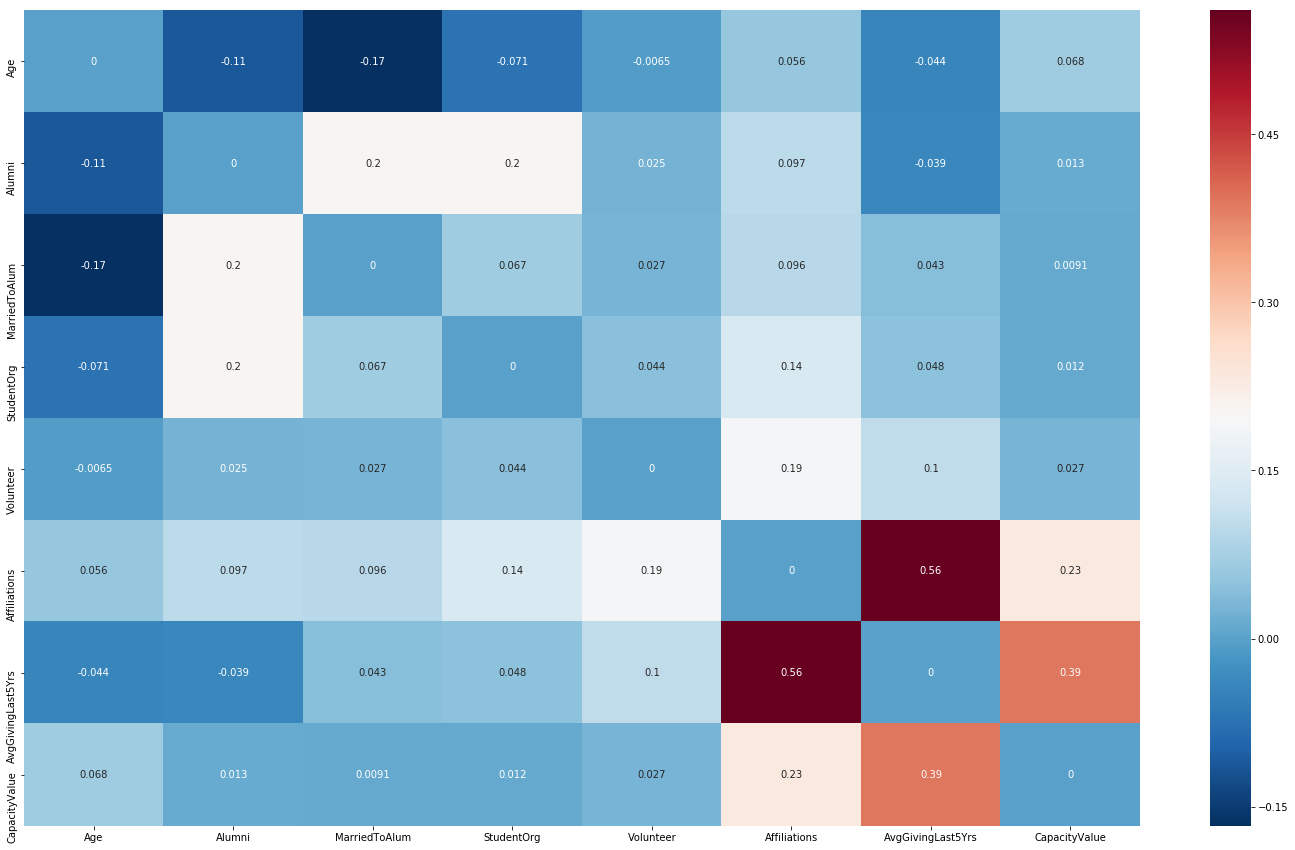

In [72]:
# set self correlation to 0 to make it easier to see strong positive correlations in heatmap
diagCorrs = prospectRegression1.corr()
np.fill_diagonal(diagCorrs.values, 0)

# correlation heatmap
plt.figure(figsize=(25,15))
sns.heatmap(diagCorrs, annot=True, cmap="RdBu_r")

In [73]:
# ordinary least squares regression report
prospectModelReduced = sm.ols("AvgGivingLast5Yrs~Age+Alumni+MarriedToAlum+StudentOrg+Volunteer+Affiliations+CapacityValue", prospectRegression)
prospectModelReduced = prospectModelReduced.fit()
print prospectModelReduced.summary()

                            OLS Regression Results                            
Dep. Variable:      AvgGivingLast5Yrs   R-squared:                       0.405
Model:                            OLS   Adj. R-squared:                  0.405
Method:                 Least Squares   F-statistic:                     3419.
Date:                Thu, 09 Nov 2017   Prob (F-statistic):               0.00
Time:                        21:52:15   Log-Likelihood:            -3.4231e+05
No. Observations:               35135   AIC:                         6.846e+05
Df Residuals:                   35127   BIC:                         6.847e+05
Df Model:                           7                                         
Covariance Type:            nonrobust                                         
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
Intercept      3035.5325    117.222     25.896

### We are still getting an issue with a large condition number. Let us try removing all the weakly correlated variables in addition to EventCount and GiftCount. This will only leave the Affiliations and CapacityLevel variables for the regression model.

In [74]:
#remove MajorGiftProspect as it is traditionally based on previous giving
prospectRegression2 = prospectRegression.drop(['Age', 
                                               'Alumni', 
                                               'MarriedToAlum', 
                                               'StudentOrg', 
                                               'Volunteer', 
                                               'EventCount', 
                                               'GiftCount'], axis =1)
prospectRegression2.head()

Affiliations  AvgGivingLast5Yrs  CapacityValue
0             1               1417          21129
1             0                179          22679
2             0                417          22678
3             0                417          17547
4             0               1333          15581

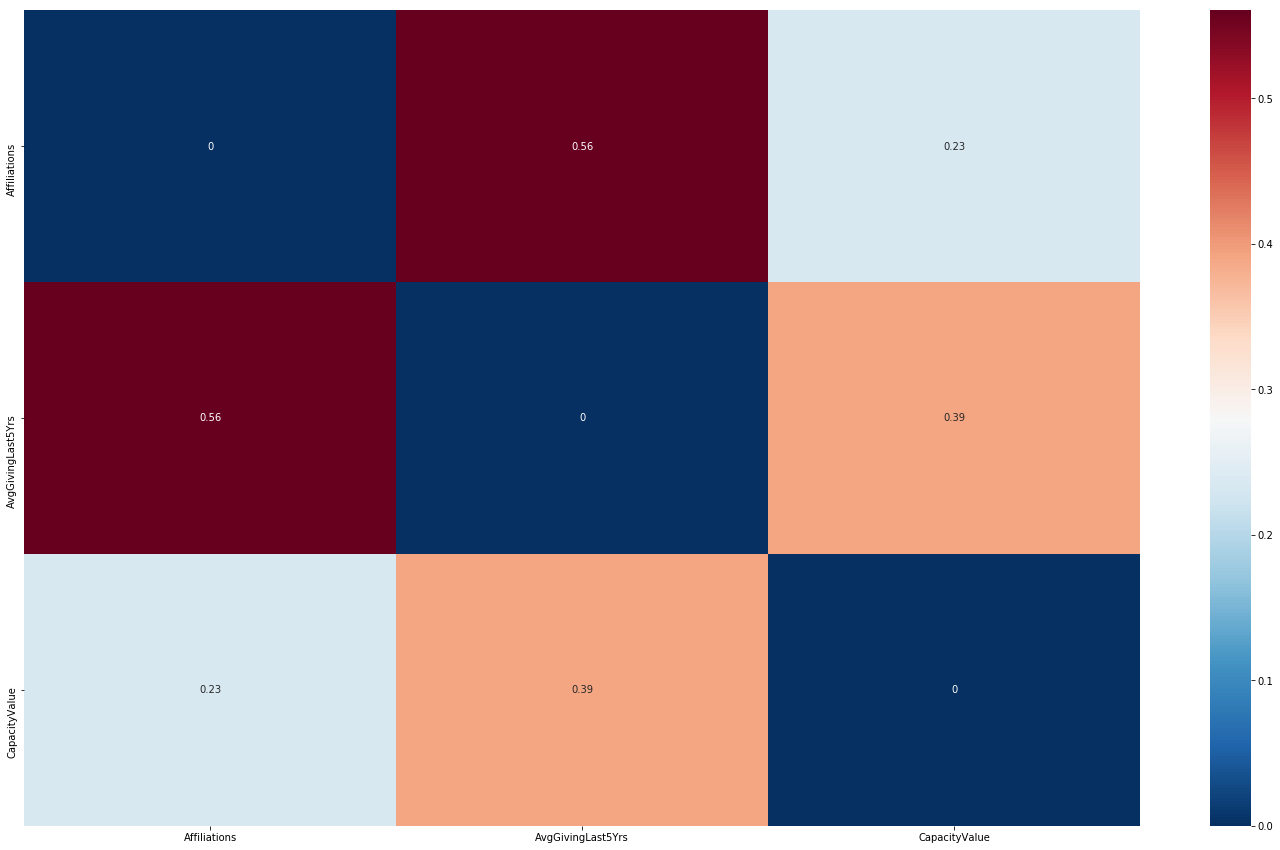

In [75]:
# set self correlation to 0 to make it easier to see strong positive correlations in heatmap
diagCorrs = prospectRegression2.corr()
np.fill_diagonal(diagCorrs.values, 0)

# correlation heatmap
plt.figure(figsize=(25,15))
sns.heatmap(diagCorrs, annot=True, cmap="RdBu_r")

In [76]:
# ordinary least squares regression report
prospectModelSmall = sm.ols("AvgGivingLast5Yrs~Affiliations+CapacityValue", prospectRegression)
prospectModelSmall = prospectModelSmall.fit()
print prospectModelSmall.summary()

                            OLS Regression Results                            
Dep. Variable:      AvgGivingLast5Yrs   R-squared:                       0.386
Model:                            OLS   Adj. R-squared:                  0.386
Method:                 Least Squares   F-statistic:                 1.105e+04
Date:                Thu, 09 Nov 2017   Prob (F-statistic):               0.00
Time:                        21:52:15   Log-Likelihood:            -3.4287e+05
No. Observations:               35135   AIC:                         6.857e+05
Df Residuals:                   35132   BIC:                         6.858e+05
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
Intercept      -670.1727     28.634    -23.405

### We still have the issue of the large condition number. As a last attempt let us try only using Affiliations.

In [77]:
#remove MajorGiftProspect as it is traditionally based on previous giving
prospectRegression3 = prospectRegression.drop(['Age', 
                                               'Alumni', 
                                               'MarriedToAlum', 
                                               'StudentOrg', 
                                               'Volunteer', 
                                               'EventCount', 
                                               'GiftCount', 
                                               'CapacityValue'], axis =1)
prospectRegression3.head()

Affiliations  AvgGivingLast5Yrs
0             1               1417
1             0                179
2             0                417
3             0                417
4             0               1333

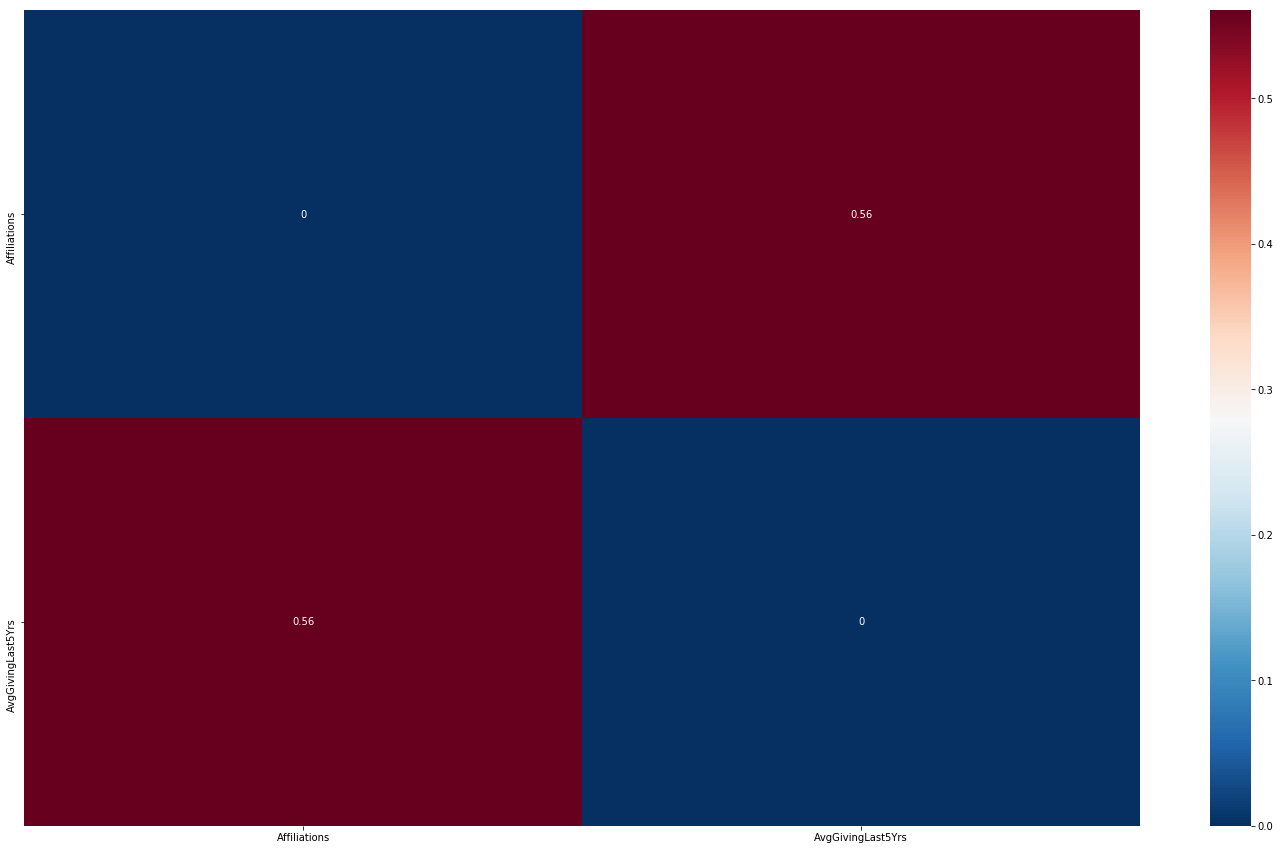

In [78]:
# set self correlation to 0 to make it easier to see strong positive correlations in heatmap
diagCorrs = prospectRegression3.corr()
np.fill_diagonal(diagCorrs.values, 0)

# correlation heatmap
plt.figure(figsize=(25,15))
sns.heatmap(diagCorrs, annot=True, cmap="RdBu_r")

In [79]:
#assigning columns to X and Y variables
y = prospectRegression3['AvgGivingLast5Yrs'] 
X = prospectRegression3.drop(['AvgGivingLast5Yrs'], axis =1)

In [80]:
# create linear regression model
modelTiny = lm.LinearRegression()
modelTiny.fit(X, y)   
modelTiny_y = modelTiny.predict(X)
print 'Coefficients: ', modelTiny.coef_
print "y-intercept ", modelTiny.intercept_

Coefficients:  [ 2744.51592833]
y-intercept  -553.896597542


In [81]:
# make it easier to read coefficients
coef = ["%.3f" % i for i in modelTiny.coef_]
xcolumns = [ i for i in X.columns ]
zip(xcolumns, coef)

[('Affiliations', '2744.516')]

In [82]:
# review MSE & R2
print "mean square error: ", mean_squared_error(y, modelTiny_y)
print "variance or r-squared: ", explained_variance_score(y, modelTiny_y)

mean square error:  19581132.1424
variance or r-squared:  0.314186249786


In [83]:
# ordinary least squares regression report
prospectModelTiny = sm.ols("AvgGivingLast5Yrs~Affiliations", prospectRegression)
prospectModelTiny = prospectModelTiny.fit()
print prospectModelTiny.summary()

                            OLS Regression Results                            
Dep. Variable:      AvgGivingLast5Yrs   R-squared:                       0.314
Model:                            OLS   Adj. R-squared:                  0.314
Method:                 Least Squares   F-statistic:                 1.610e+04
Date:                Thu, 09 Nov 2017   Prob (F-statistic):               0.00
Time:                        21:52:16   Log-Likelihood:            -3.4481e+05
No. Observations:               35135   AIC:                         6.896e+05
Df Residuals:                   35133   BIC:                         6.896e+05
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
Intercept     -553.8966     30.206    -18.337   

### We have finally removed the large condition value from our regression analysis but our R-squared is only 0.314. This is too weak of a R-square to be of much help to us. We can visually see this when reviewing the regression line.

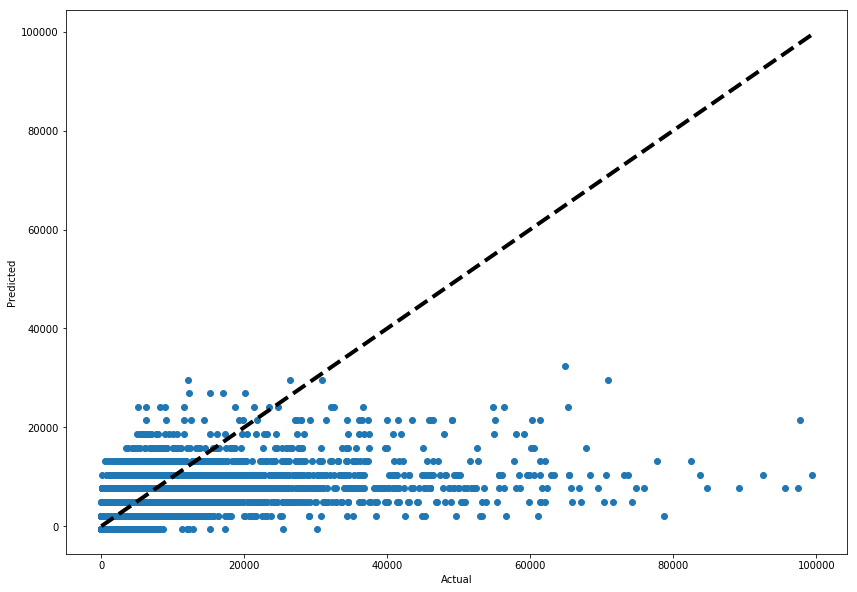

In [84]:
# visualize actual vs predicted
plt.figure(figsize=(14,10))
plt.scatter(y, modelTiny_y)
plt.plot([y.min(), y.max()], [y.min(), y.max()], 'k--', lw=4)
plt.xlabel('Actual')
plt.ylabel('Predicted')

### Our regression model is unable to predict a high enough value after a threshold around 20,000(ish). Perhaps with different data we could reattempt to predict a prospects value again but for now let us move on and attempt Classification Methods in order to just identify new major gift donor prospects.

# Classification Modeling

### With Classification Modeling we will be using the MajorGiftProspect variable as the prospects has already been labeled as being a major gift prospect or not. Again, since traditionally at NESW State Tech prospects have been labeled so after review of thier previous giving we will remove AvgGivingLast5Yrs from the analysis since we are interested in being able to identify new potential prospects via other variables.

In [85]:
# declare X variables and y variable
y = prospect['MajorGiftProspect']
X = prospect.drop(['MajorGiftProspect', 'AvgGivingLast5Yrs'],axis=1)

## Logistic Regression

In [86]:
# split into train and test sets and build a logistic regression model

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)
lr = LogisticRegression()
lr.fit(X_train, y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)

In [87]:
# model evaluation

print metrics.accuracy_score(y_test, lr.predict(X_test))
print metrics.confusion_matrix(y_test, lr.predict(X_test))
print metrics.classification_report(y_test, lr.predict(X_test))
print metrics.roc_auc_score(y_test, lr.predict(X_test))

0.936723271037
[[9422  203]
 [ 464  452]]
             precision    recall  f1-score   support

          0       0.95      0.98      0.97      9625
          1       0.69      0.49      0.58       916

avg / total       0.93      0.94      0.93     10541

0.736179436284


In [88]:
# validate 
scores = cross_val_score(lr, X, y, scoring='accuracy', cv=10)
print scores
print scores.mean()

[ 0.94166192  0.94365396  0.94479226  0.93796244  0.94678429  0.9390834
  0.9430686   0.94392257  0.9430686   0.93993738]
0.942393542418


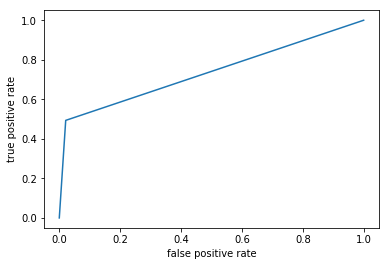

False-positive rate: [ 0.          0.02109091  1.        ]
True-positive rate:  [ 0.          0.49344978  1.        ]
AUC score:  0.736179436284


In [89]:
# ROC chart

fpr, tpr, thresholds = metrics.roc_curve(y_test,lr.predict(X_test))
plt.subplot()
plt.xlabel('false positive rate')
plt.ylabel('true positive rate')
plt.plot(fpr, tpr)
plt.show()

print "False-positive rate:", fpr
print "True-positive rate: ", tpr
print "AUC score: ", metrics.roc_auc_score(y_test, lr.predict(X_test))

### Logistic regression model is more accurate than the linear regression we evaluated earlier. The model has a 94.2% accuracy, but the accuracy is due to it being very efficient at disqualifying prospects from being major gift prospects. The true positive rate is only about 49%. The model is usable with a AUC score of 0.74 but we would be only partially successful. Let's evaluate other classification models to see if we can get a better true positive rate.

# Decision Tree

In [90]:
# split into train and test sets

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)
dt = DecisionTreeClassifier()
dt.fit(X_train, y_train)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best')

In [91]:
#Model evaluation

print metrics.accuracy_score(y_test, dt.predict(X_test))
print "---------------------------------------------------"
print metrics.confusion_matrix(y_test, dt.predict(X_test))
print "---------------------------------------------------"
print metrics.classification_report(y_test, dt.predict(X_test))
print "---------------------------------------------------"
print metrics.roc_auc_score(y_test, dt.predict(X_test))

0.938241153591
---------------------------------------------------
[[9272  353]
 [ 298  618]]
---------------------------------------------------
             precision    recall  f1-score   support

          0       0.97      0.96      0.97      9625
          1       0.64      0.67      0.66       916

avg / total       0.94      0.94      0.94     10541

---------------------------------------------------
0.818998582204


### Decision tree has an accuracy of 93% and its AUC acore is 81%. This is much better than logisitic regression model.  Let's review the decision tree model visually.

In [92]:
# Visualize the decision tree model

dot_data = StringIO() 
tree.export_graphviz(dt, out_file=dot_data, feature_names=X.columns,
                     filled=True, rounded=True, special_characters=True)
graph = pydotplus.graph_from_dot_data(dot_data.getvalue())
graph.write_pdf("data/dt.pdf")
Image(graph.create_png())

dot: graph is too large for cairo-renderer bitmaps. Scaling by 0.595028 to fit



### Oh... Umm... Well... The decision tree is much too complex to be explainable. Let's try a simplified version that could be used to expalin how it works.

In [93]:
# decision model with max_depth 3 and min_samples_leaf 5

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)
dt_simple = DecisionTreeClassifier(max_depth=3, min_samples_leaf=5)
dt_simple.fit(X_train, y_train)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=3,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=5, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best')

In [94]:
# performance of this model

print metrics.accuracy_score(y_test, dt_simple.predict(X_test))
print "---------------------------------------------------"
print metrics.confusion_matrix(y_test, dt_simple.predict(X_test))
print "---------------------------------------------------"
print metrics.classification_report(y_test, dt_simple.predict(X_test))
print "---------------------------------------------------"
print metrics.roc_auc_score(y_test, dt_simple.predict(X_test))

0.947822787212
---------------------------------------------------
[[9349  276]
 [ 274  642]]
---------------------------------------------------
             precision    recall  f1-score   support

          0       0.97      0.97      0.97      9625
          1       0.70      0.70      0.70       916

avg / total       0.95      0.95      0.95     10541

---------------------------------------------------
0.836099018885


### Interestingly the pruned decision tree turns out to be more accurate than the full tree. Accuracy is 94.7% with tAUC score of 0.836.

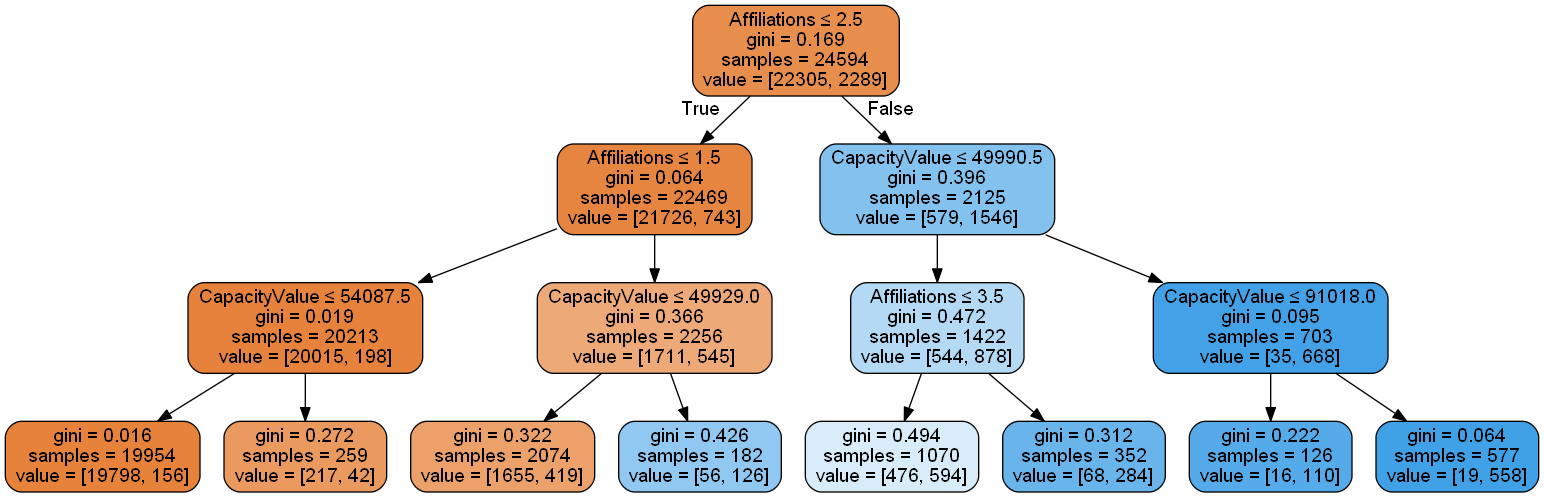

In [95]:
# simpler decision tree model visualization

dot_data = StringIO() 
tree.export_graphviz(dt_simple, out_file=dot_data, feature_names=X.columns,
                     filled=True, rounded=True, special_characters=True)
graph = pydotplus.graph_from_dot_data(dot_data.getvalue())
graph.write_pdf("data/dt_simple.pdf")
Image(graph.create_png())

### This decision tree will be much easier to explain to management than the full tree. Let's validate our model.

In [96]:
# evaluate the simple decision tree model using 10-fold cross-validation
scores = cross_val_score(dt_simple, X, y, scoring='accuracy', cv=10)
print scores
print scores.mean()

[ 0.9408082   0.94735344  0.94934548  0.95276039  0.94763802  0.94847709
  0.94221463  0.94676914  0.95473954  0.94933106]
0.947943697537


In [97]:
print "Features sorted by their rank:"
print sorted(zip(map(lambda x: round(x, 4), dt_simple.feature_importances_), X.columns))

Features sorted by their rank:
[(0.0, 'Age'), (0.0, 'Alumni'), (0.0, 'EventCount'), (0.0, 'GiftCount'), (0.0, 'MarriedToAlum'), (0.0, 'StudentOrg'), (0.0, 'Volunteer'), (0.0855, 'CapacityValue'), (0.9145, 'Affiliations')]


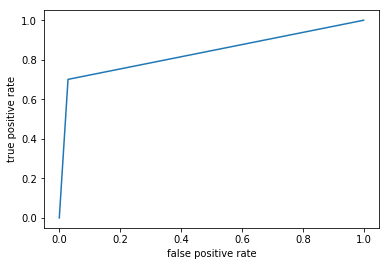

False-positive rate: [ 0.          0.02867532  1.        ]
True-positive rate: [ 0.          0.70087336  1.        ]
AUC score:  0.836099018885


In [98]:
# ROC chart

fpr, tpr, thresholds = metrics.roc_curve(y_test, dt_simple.predict(X_test))
plt.subplot()
plt.xlabel('false positive rate')
plt.ylabel('true positive rate')
plt.plot(fpr, tpr)
plt.show()

print "False-positive rate:", fpr
print "True-positive rate:", tpr
print "AUC score: ", metrics.roc_auc_score(y_test, dt_simple.predict(X_test))

### Pruned decision tree is a viable model to use but let's try one more classification model to see if we can still get a little more accurate.

## KNN

In [99]:
# split into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.3, random_state=0)
knn = KNeighborsClassifier()
knn.fit(X_train, y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=1, n_neighbors=5, p=2,
           weights='uniform')

In [100]:
#Model evaluation without valdation
print metrics.accuracy_score(y_test, knn.predict(X_test))
print metrics.confusion_matrix(y_test, knn.predict(X_test))
print metrics.classification_report(y_test, knn.predict(X_test))
print metrics.roc_auc_score(y_test, knn.predict(X_test))

0.930556873162
[[9500  125]
 [ 607  309]]
             precision    recall  f1-score   support

          0       0.94      0.99      0.96      9625
          1       0.71      0.34      0.46       916

avg / total       0.92      0.93      0.92     10541

0.662174615777


In [101]:
# evaluate the knn model using 10-fold cross-validation
scores = cross_val_score(knn, X, y, scoring='accuracy', cv=10)
print scores
print scores.mean()

[ 0.92914058  0.92373364  0.92942516  0.92942516  0.92003415  0.92314261
  0.92228864  0.92570453  0.93168232  0.91915742]
0.925373419907


### Using the default k for KNN is not as good of a model as pruned decision tree. Let's look for an optimal k to test.

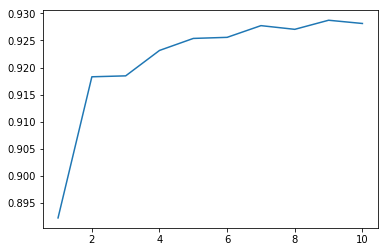

In [102]:
knn = KNeighborsClassifier()
k_range = range(1, 11)
param_grid = dict(n_neighbors=k_range)
grid = GridSearchCV(knn, param_grid, cv=10, scoring='accuracy')
grid.fit(X, y)

# check the results of the grid search
grid.grid_scores_
grid_mean_scores = [result[1] for result in grid.grid_scores_]
plt.figure()
plt.plot(k_range, grid_mean_scores)
plt.show()

In [103]:
print grid.best_score_
print grid.best_params_
print grid.best_estimator_

0.928732033585
{'n_neighbors': 9}
KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=1, n_neighbors=9, p=2,
           weights='uniform')


In [104]:
# develop new knn model with k = 9
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.3, random_state=0)
knn = KNeighborsClassifier(n_neighbors = 9)
knn.fit(X_train, y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=1, n_neighbors=9, p=2,
           weights='uniform')

In [105]:
#Model evaluation without valdation
print metrics.accuracy_score(y_test, knn.predict(X_test))
print metrics.confusion_matrix(y_test, knn.predict(X_test))
print metrics.classification_report(y_test, knn.predict(X_test))
print metrics.roc_auc_score(y_test, knn.predict(X_test))

0.93359263827
[[9525  100]
 [ 600  316]]
             precision    recall  f1-score   support

          0       0.94      0.99      0.96      9625
          1       0.76      0.34      0.47       916

avg / total       0.93      0.93      0.92     10541

0.667294277775


In [106]:
# validate KNN=9 model
scores = cross_val_score(knn, X, y, scoring='accuracy', cv=10)
print scores
print scores.mean()

[ 0.92970973  0.92800228  0.93255549  0.93397837  0.92458736  0.92712781
  0.92541987  0.92940507  0.93225164  0.92428124]
0.92873188633


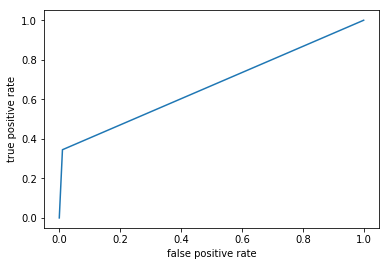

False-positive rate: [ 0.          0.01038961  1.        ]
True-positive rate: [ 0.          0.34497817  1.        ]
AUC score:  0.667294277775


In [107]:
# ROC chart

fpr, tpr, thresholds = metrics.roc_curve(y_test, knn.predict(X_test))
plt.subplot()
plt.xlabel('false positive rate')
plt.ylabel('true positive rate')
plt.plot(fpr, tpr)
plt.show()

print "False-positive rate:", fpr
print "True-positive rate:", tpr
print "AUC score: ", metrics.roc_auc_score(y_test, knn.predict(X_test))

### KNN model is not as good of model as pruned decision tree. The accuracy of decision tree and ease of explain the model via visualization of tree makes it the clear choice of model to use. Before we move on let's evaluate using Random Forest though. It is a more robust version of Decision Tree in that it creates multiple decision trees to evaluate where a variable should be classified.

## Random Forest

In [108]:
# create random forest model
clf = RandomForestClassifier(n_estimators=20)
clf=clf.fit(X, y)
clf.score(X,y)

0.99851999430767047

In [109]:
# evaluation metrics
print metrics.accuracy_score(y, clf.predict(X))
print metrics.confusion_matrix(y, clf.predict(X))
print metrics.classification_report(y, clf.predict(X))

0.998519994308
[[31923     7]
 [   45  3160]]
             precision    recall  f1-score   support

          0       1.00      1.00      1.00     31930
          1       1.00      0.99      0.99      3205

avg / total       1.00      1.00      1.00     35135



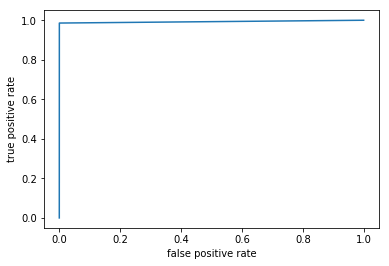

False-positive rate: [  0.00000000e+00   2.07792208e-04   1.00000000e+00]
True-positive rate: [ 0.          0.98580786  1.        ]
AUC score:  0.992800034027


In [110]:
# ROC chart

fpr, tpr, thresholds = metrics.roc_curve(y_test, clf.predict(X_test))
plt.subplot()
plt.xlabel('false positive rate')
plt.ylabel('true positive rate')
plt.plot(fpr, tpr)
plt.show()

print "False-positive rate:", fpr
print "True-positive rate:", tpr
print "AUC score: ", metrics.roc_auc_score(y_test, clf.predict(X_test))

### Random Forest model is the most accurate model at the cost of explaining exactly what it has actually done. We can however see how important it values each variable.

In [111]:
# evaluate variable importance
pd.DataFrame({'feature':X.columns, 'importance':clf.feature_importances_})

feature  importance
0            Age    0.100647
1         Alumni    0.017547
2  MarriedToAlum    0.010116
3     StudentOrg    0.021387
4      Volunteer    0.007753
5   Affiliations    0.397004
6     EventCount    0.061174
7      GiftCount    0.122244
8  CapacityValue    0.262127

### Use Decision Tree & Random Forrest models to predict rest of prospect database

In [112]:
# import dataset to score
score = pd.read_csv("data/ToScore.csv")
score.head()

ID FirstName   LastName  Age  Alumni  MarriedToAlum  StudentOrg  Volunteer  \
0   4       Ari      Stark   34       1              1           0          0   
1   5   Addison    Parrish   56       1              1           0          0   
2   7     Milan  Hendricks   34       1              0           0          0   
3   8     Ayaan    Parsons   34       1              0           0          0   
4  13    Skylar  Blanchard   34       1              0           1          0   

   Affiliations  EventCount  AvgGivingLast5Yrs  MajorGiftProspect  GiftCount  \
0             1           1              19.82                  0          6   
1             0           1               4.87                  0         11   
2             0           0               0.00                  0          0   
3             0           0               0.00                  0          0   
4             0           0              20.59                  0          8   

   CapacityValue  
0          23129  
1           8297  
2          21185  
3           3734  
4          15233

In [113]:
# remove 'ID' "First Name', 'Last Name' 'AvgGivingLast5Yrs', and 'MajorGiftProspect' columns 
# as they are not needed for analysis

scoreCleaned = score.drop(['ID', 'FirstName', 'LastName', 'AvgGivingLast5Yrs', 'MajorGiftProspect'], axis=1)
scoreCleaned.head()

Age  Alumni  MarriedToAlum  StudentOrg  Volunteer  Affiliations  \
0   34       1              1           0          0             1   
1   56       1              1           0          0             0   
2   34       1              0           0          0             0   
3   34       1              0           0          0             0   
4   34       1              0           1          0             0   

   EventCount  GiftCount  CapacityValue  
0           1          6          23129  
1           1         11           8297  
2           0          0          21185  
3           0          0           3734  
4           0          8          15233

### Decision Tree

In [114]:
# predict if prospects are major giving using decision tree model

output_scoring = dt_simple.predict(scoreCleaned)
predicted_y = pd.DataFrame(output_scoring, columns=['PredictedMG'])

probs = dt_simple.predict_proba(scoreCleaned)
probs = pd.DataFrame(probs, columns=['prob of NO', 'prob of YES'])

MGProspects = predicted_y.join(probs)

MGProspects.head()


PredictedMG  prob of NO  prob of YES
0            0    0.992182     0.007818
1            0    0.992182     0.007818
2            0    0.992182     0.007818
3            0    0.992182     0.007818
4            0    0.992182     0.007818

In [115]:
# join results to original datset and save

DTPredictedMG = score.join(MGProspects)
DTPredictedMG.to_csv("data/output_MGProspects_DecisionTree_ScoringDataset.csv")
DTPredictedMG.head()

ID FirstName   LastName  Age  Alumni  MarriedToAlum  StudentOrg  Volunteer  \
0   4       Ari      Stark   34       1              1           0          0   
1   5   Addison    Parrish   56       1              1           0          0   
2   7     Milan  Hendricks   34       1              0           0          0   
3   8     Ayaan    Parsons   34       1              0           0          0   
4  13    Skylar  Blanchard   34       1              0           1          0   

   Affiliations  EventCount  AvgGivingLast5Yrs  MajorGiftProspect  GiftCount  \
0             1           1              19.82                  0          6   
1             0           1               4.87                  0         11   
2             0           0               0.00                  0          0   
3             0           0               0.00                  0          0   
4             0           0              20.59                  0          8   

   CapacityValue  PredictedMG  prob of NO  prob of YES  
0          23129            0    0.992182     0.007818  
1           8297            0    0.992182     0.007818  
2          21185            0    0.992182     0.007818  
3           3734            0    0.992182     0.007818  
4          15233            0    0.992182     0.007818

### Random Forrest

In [116]:
# predict if prospects are random forrest using decision tree model

output_scoring = clf.predict(scoreCleaned)
predicted_y = pd.DataFrame(output_scoring, columns=['PredictedMG'])

probs = clf.predict_proba(scoreCleaned)
probs = pd.DataFrame(probs, columns=['prob of NO', 'prob of YES'])

MGProspects = predicted_y.join(probs)

MGProspects.to_csv("data/output_MGProspects_RandomForest_ScoringDataset.csv")

MGProspects.head()

PredictedMG  prob of NO  prob of YES
0            0         1.0          0.0
1            0         1.0          0.0
2            0         1.0          0.0
3            0         1.0          0.0
4            0         1.0          0.0

In [117]:
# join results to original datset and save

RFPredictedMG = score.join(MGProspects)
RFPredictedMG.to_csv("data/output_MGProspects_RandomForest_ScoringDataset.csv")
RFPredictedMG.head()

ID FirstName   LastName  Age  Alumni  MarriedToAlum  StudentOrg  Volunteer  \
0   4       Ari      Stark   34       1              1           0          0   
1   5   Addison    Parrish   56       1              1           0          0   
2   7     Milan  Hendricks   34       1              0           0          0   
3   8     Ayaan    Parsons   34       1              0           0          0   
4  13    Skylar  Blanchard   34       1              0           1          0   

   Affiliations  EventCount  AvgGivingLast5Yrs  MajorGiftProspect  GiftCount  \
0             1           1              19.82                  0          6   
1             0           1               4.87                  0         11   
2             0           0               0.00                  0          0   
3             0           0               0.00                  0          0   
4             0           0              20.59                  0          8   

   CapacityValue  PredictedMG  prob of NO  prob of YES  
0          23129            0         1.0          0.0  
1           8297            0         1.0          0.0  
2          21185            0         1.0          0.0  
3           3734            0         1.0          0.0  
4          15233            0         1.0          0.0

### We now have our data scored and can start sending the list of new prospects to our development officers to reach out to.